In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ACCESSING DATA FROM GOOGLE DRIVE

Let's break down the code:

from google.colab import drive: This line imports the drive module from the google.colab library. Google Colab provides this library to interact with Google Drive.

drive.mount("/content/drive"): This line mounts Google Drive in the Colab environment. After running this line, we'll be prompted to enter an authentication code to allow Colab to access your Google Drive.

!pwd: This line is a shell command executed using the ! prefix in Colab. It prints the current working directory in the Colab environment.

!ls /content/drive/MyDrive/city_hour[1].csv: This line lists the files in the directory specified by the path /content/drive/MyDrive/. The [1] in the file name suggests that there might be multiple files with similar names but different extensions (e.g., city_hour1.csv, city_hour2.csv, etc.). The square brackets [1] are used for shell expansion, which means it will match any single character inside the brackets. So, this command lists files matching the pattern city_hour1.csv in the specified directory.








In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!pwd

/content


In [5]:
!ls /content/drive/MyDrive/city_hour[1].csv

'/content/drive/MyDrive/city_hour[1].csv'


In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import os                          # operating system interfaces
import glob                        # working with OS pathnames
import time                        # time processing
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt    # data visualization purposes
import seaborn as sns              # statistical data visualization



In [7]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/city_hour[1].csv')
df


City             Datetime  PM2.5   PM10    NO    NO2    NOx  \
0           Ahmedabad  2015-01-01 01:00:00    NaN    NaN  1.00  40.01  36.37   
1           Ahmedabad  2015-01-01 02:00:00    NaN    NaN  0.02  27.75  19.73   
2           Ahmedabad  2015-01-01 03:00:00    NaN    NaN  0.08  19.32  11.08   
3           Ahmedabad  2015-01-01 04:00:00    NaN    NaN  0.30  16.45   9.20   
4           Ahmedabad  2015-01-01 05:00:00    NaN    NaN  0.12  14.90   7.85   
...               ...                  ...    ...    ...   ...    ...    ...   
707870  Visakhapatnam  2020-06-30 20:00:00   9.50  36.00  2.75  25.57  15.85   
707871  Visakhapatnam  2020-06-30 21:00:00  17.25  49.25  3.62  33.20  20.62   
707872  Visakhapatnam  2020-06-30 22:00:00  36.00  71.00  2.20  30.80  18.20   
707873  Visakhapatnam  2020-06-30 23:00:00  15.75  63.00  1.02  28.90  16.00   
707874  Visakhapatnam  2020-07-01 00:00:00  15.00  66.00  0.40  26.85  14.05   

         NH3    CO     SO2      O3  Benzene  Toluene  Xylene   AQI  \
0        NaN  1.00  122.07     NaN      0.0      0.0     0.0   NaN   
1        NaN  0.02   85.90     NaN      0.0      0.0     0.0   NaN   
2        NaN  0.08   52.83     NaN      0.0      0.0     0.0   NaN   
3        NaN  0.30   39.53  153.58      0.0      0.0     0.0   NaN   
4        NaN  0.12   32.63     NaN      0.0      0.0     0.0   NaN   
...      ...   ...     ...     ...      ...      ...     ...   ...   
707870  4.57  0.62     NaN   27.75      NaN      NaN     NaN  51.0   
707871  3.78  0.76    2.02   25.58      NaN      NaN     NaN  51.0   
707872  3.67  0.58    1.77   26.15      NaN      NaN     NaN  50.0   
707873  3.80  0.49    0.75   15.82      NaN      NaN     NaN  50.0   
707874  5.20  0.59    2.10   17.05      NaN      NaN     NaN  50.0   

          AQI_Bucket  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
707870  Satisfactory  
707871  Satisfactory  
707872          Good  
707873          Good  
707874          Good  

[707875 rows x 16 columns]

In [73]:
df.shape

(707875, 16)

In [9]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [10]:
unique_cities = df['City'].unique()
total_unique_cities = len(unique_cities)
total_unique_cities

26

The below code returns a Series object containing the total number of missing values in each column of the DataFrame 'df'.

In [12]:
df.isnull().sum()


City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [13]:
# Calculate the total number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the total number of entries in the DataFrame
total_entries = df.shape[0]

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / total_entries) * 100

# Sort the missing_percentage Series in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values in each column (descending order):")
print(missing_percentage_sorted)


Percentage of missing values in each column (descending order):
Xylene        64.393996
PM10          41.919407
NH3           38.501430
Toluene       31.164683
Benzene       23.117923
PM2.5         20.496274
SO2           18.417517
O3            18.252940
AQI           18.234858
AQI_Bucket    18.234858
NOx           17.407593
NO2           16.545577
NO            16.476355
CO            12.222073
City           0.000000
Datetime       0.000000
dtype: float64


VISUALIZATION OF MISSING VALUES PERCENTAGE

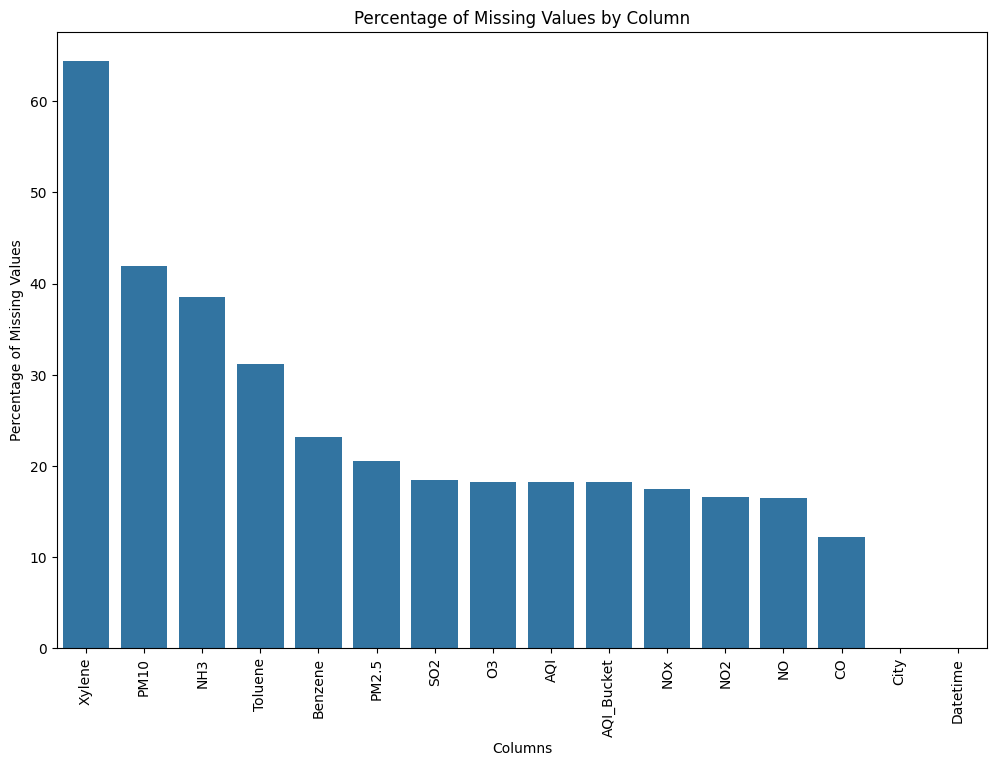

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the total number of entries in the DataFrame
total_entries = df.shape[0]

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / total_entries) * 100

# Sort the missing_percentage Series in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Visualize the missing percentages using a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.show()


In [15]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode,iplot
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.special import boxcox1p
import pylab
import scipy.stats as stats
%matplotlib inline
# Transformation and modelling packages
from sklearn.model_selection import train_test_split , KFold
from sklearn.metrics import accuracy_score
from sklearn. preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

By executing the below line of code, the values in the 'Datetime' column, which may have been in different formats (e.g., strings, objects), are converted to datetime objects. This makes it easier to work with dates and times in subsequent analysis or visualization tasks.








In [16]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [17]:
df.tail()

City            Datetime  PM2.5   PM10    NO    NO2    NOx  \
707870  Visakhapatnam 2020-06-30 20:00:00   9.50  36.00  2.75  25.57  15.85   
707871  Visakhapatnam 2020-06-30 21:00:00  17.25  49.25  3.62  33.20  20.62   
707872  Visakhapatnam 2020-06-30 22:00:00  36.00  71.00  2.20  30.80  18.20   
707873  Visakhapatnam 2020-06-30 23:00:00  15.75  63.00  1.02  28.90  16.00   
707874  Visakhapatnam 2020-07-01 00:00:00  15.00  66.00  0.40  26.85  14.05   

         NH3    CO   SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
707870  4.57  0.62   NaN  27.75      NaN      NaN     NaN  51.0  Satisfactory  
707871  3.78  0.76  2.02  25.58      NaN      NaN     NaN  51.0  Satisfactory  
707872  3.67  0.58  1.77  26.15      NaN      NaN     NaN  50.0          Good  
707873  3.80  0.49  0.75  15.82      NaN      NaN     NaN  50.0          Good  
707874  5.20  0.59  2.10  17.05      NaN      NaN     NaN  50.0          Good

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        707875 non-null  object        
 1   Datetime    707875 non-null  datetime64[ns]
 2   PM2.5       562787 non-null  float64       
 3   PM10        411138 non-null  float64       
 4   NO          591243 non-null  float64       
 5   NO2         590753 non-null  float64       
 6   NOx         584651 non-null  float64       
 7   NH3         435333 non-null  float64       
 8   CO          621358 non-null  float64       
 9   SO2         577502 non-null  float64       
 10  O3          578667 non-null  float64       
 11  Benzene     544229 non-null  float64       
 12  Toluene     487268 non-null  float64       
 13  Xylene      252046 non-null  float64       
 14  AQI         578795 non-null  float64       
 15  AQI_Bucket  578795 non-null  object        
dtypes:

In [19]:
import pandas as pd


# Create a copy of the DataFrame
df_copy = df.copy()

# Check unique values in the 'AQI_Bucket' column before mapping
print("Unique values in 'AQI_Bucket' before mapping:", df_copy['AQI_Bucket'].unique())

# Map categorical values in 'AQI_Bucket' to numerical values
df_copy['AQI_Bucket'] = df_copy['AQI_Bucket'].map({
    'Good': 0,
    'Satisfactory': 1,
    'Moderate': 2,
    'Poor': 3,
    'Very Poor': 4,
    'Severe': 5
})

# Check unique values in the 'AQI_Bucket' column after mapping
print("Unique values in 'AQI_Bucket' after mapping:", df_copy['AQI_Bucket'].unique())


Unique values in 'AQI_Bucket' before mapping: [nan 'Poor' 'Moderate' 'Very Poor' 'Severe' 'Satisfactory' 'Good']
Unique values in 'AQI_Bucket' after mapping: [nan  3.  2.  4.  5.  1.  0.]


In [20]:
df.describe()

Datetime          PM2.5           PM10  \
count                         707875  562787.000000  411138.000000   
mean   2018-05-14 02:41:03.445098752      67.622994     119.075804   
min              2015-01-01 01:00:00       0.010000       0.010000   
25%              2017-04-15 23:00:00      26.200000      52.380000   
50%              2018-08-04 20:00:00      46.420000      91.500000   
75%              2019-09-02 14:00:00      79.490000     147.520000   
max              2020-07-01 00:00:00     999.990000    1000.000000   
std                              NaN      74.730496     104.224752   

                  NO            NO2            NOx            NH3  \
count  591243.000000  590753.000000  584651.000000  435333.000000   
mean       17.421755      28.885157      32.287565      23.607959   
min         0.010000       0.010000       0.000000       0.010000   
25%         3.840000      10.810000      10.660000       8.120000   
50%         7.960000      20.320000      20.790000      15.380000   
75%        16.150000      36.350000      37.150000      29.230000   
max       499.990000     499.510000     498.610000     499.970000   
std        32.095211      29.162194      39.756669      28.831900   

                  CO            SO2             O3        Benzene  \
count  621358.000000  577502.000000  578667.000000  544229.000000   
mean        2.183539      14.038307      34.798979       3.087595   
min         0.000000       0.010000       0.010000       0.000000   
25%         0.420000       4.880000      13.420000       0.050000   
50%         0.800000       8.370000      26.240000       0.860000   
75%         1.370000      14.780000      47.620000       2.750000   
max       498.570000     199.960000     497.620000     498.070000   
std        10.970514      19.305540      29.806379      16.456599   

             Toluene         Xylene            AQI  
count  487268.000000  252046.000000  578795.000000  
mean        8.660927       3.130537     166.413500  
min         0.000000       0.000000       8.000000  
25%         0.370000       0.100000      79.000000  
50%         2.590000       0.790000     116.000000  
75%         8.410000       3.120000     208.000000  
max       499.400000     499.990000    3133.000000  
std        21.741023       7.834832     162.112729

In [21]:
df_copy.describe()

Datetime          PM2.5           PM10  \
count                         707875  562787.000000  411138.000000   
mean   2018-05-14 02:41:03.445098752      67.622994     119.075804   
min              2015-01-01 01:00:00       0.010000       0.010000   
25%              2017-04-15 23:00:00      26.200000      52.380000   
50%              2018-08-04 20:00:00      46.420000      91.500000   
75%              2019-09-02 14:00:00      79.490000     147.520000   
max              2020-07-01 00:00:00     999.990000    1000.000000   
std                              NaN      74.730496     104.224752   

                  NO            NO2            NOx            NH3  \
count  591243.000000  590753.000000  584651.000000  435333.000000   
mean       17.421755      28.885157      32.287565      23.607959   
min         0.010000       0.010000       0.000000       0.010000   
25%         3.840000      10.810000      10.660000       8.120000   
50%         7.960000      20.320000      20.790000      15.380000   
75%        16.150000      36.350000      37.150000      29.230000   
max       499.990000     499.510000     498.610000     499.970000   
std        32.095211      29.162194      39.756669      28.831900   

                  CO            SO2             O3        Benzene  \
count  621358.000000  577502.000000  578667.000000  544229.000000   
mean        2.183539      14.038307      34.798979       3.087595   
min         0.000000       0.010000       0.010000       0.000000   
25%         0.420000       4.880000      13.420000       0.050000   
50%         0.800000       8.370000      26.240000       0.860000   
75%         1.370000      14.780000      47.620000       2.750000   
max       498.570000     199.960000     497.620000     498.070000   
std        10.970514      19.305540      29.806379      16.456599   

             Toluene         Xylene            AQI     AQI_Bucket  
count  487268.000000  252046.000000  578795.000000  578795.000000  
mean        8.660927       3.130537     166.413500       1.996299  
min         0.000000       0.000000       8.000000       0.000000  
25%         0.370000       0.100000      79.000000       1.000000  
50%         2.590000       0.790000     116.000000       2.000000  
75%         8.410000       3.120000     208.000000       3.000000  
max       499.400000     499.990000    3133.000000       5.000000  
std        21.741023       7.834832     162.112729       1.239471

In [22]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

KDE PLOT OF ALL NUMERIC COLUMNS IN 'df_copy' (THIS INCLUDES THE AQI_Bucket)

<ipython-input-26-5f3ec0a24601>:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-26-5f3ec0a24601>:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-26-5f3ec0a24601>:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-26-5f3ec0a24601>:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-26-5f3ec0a24601>:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-26-5f3ec0a24601

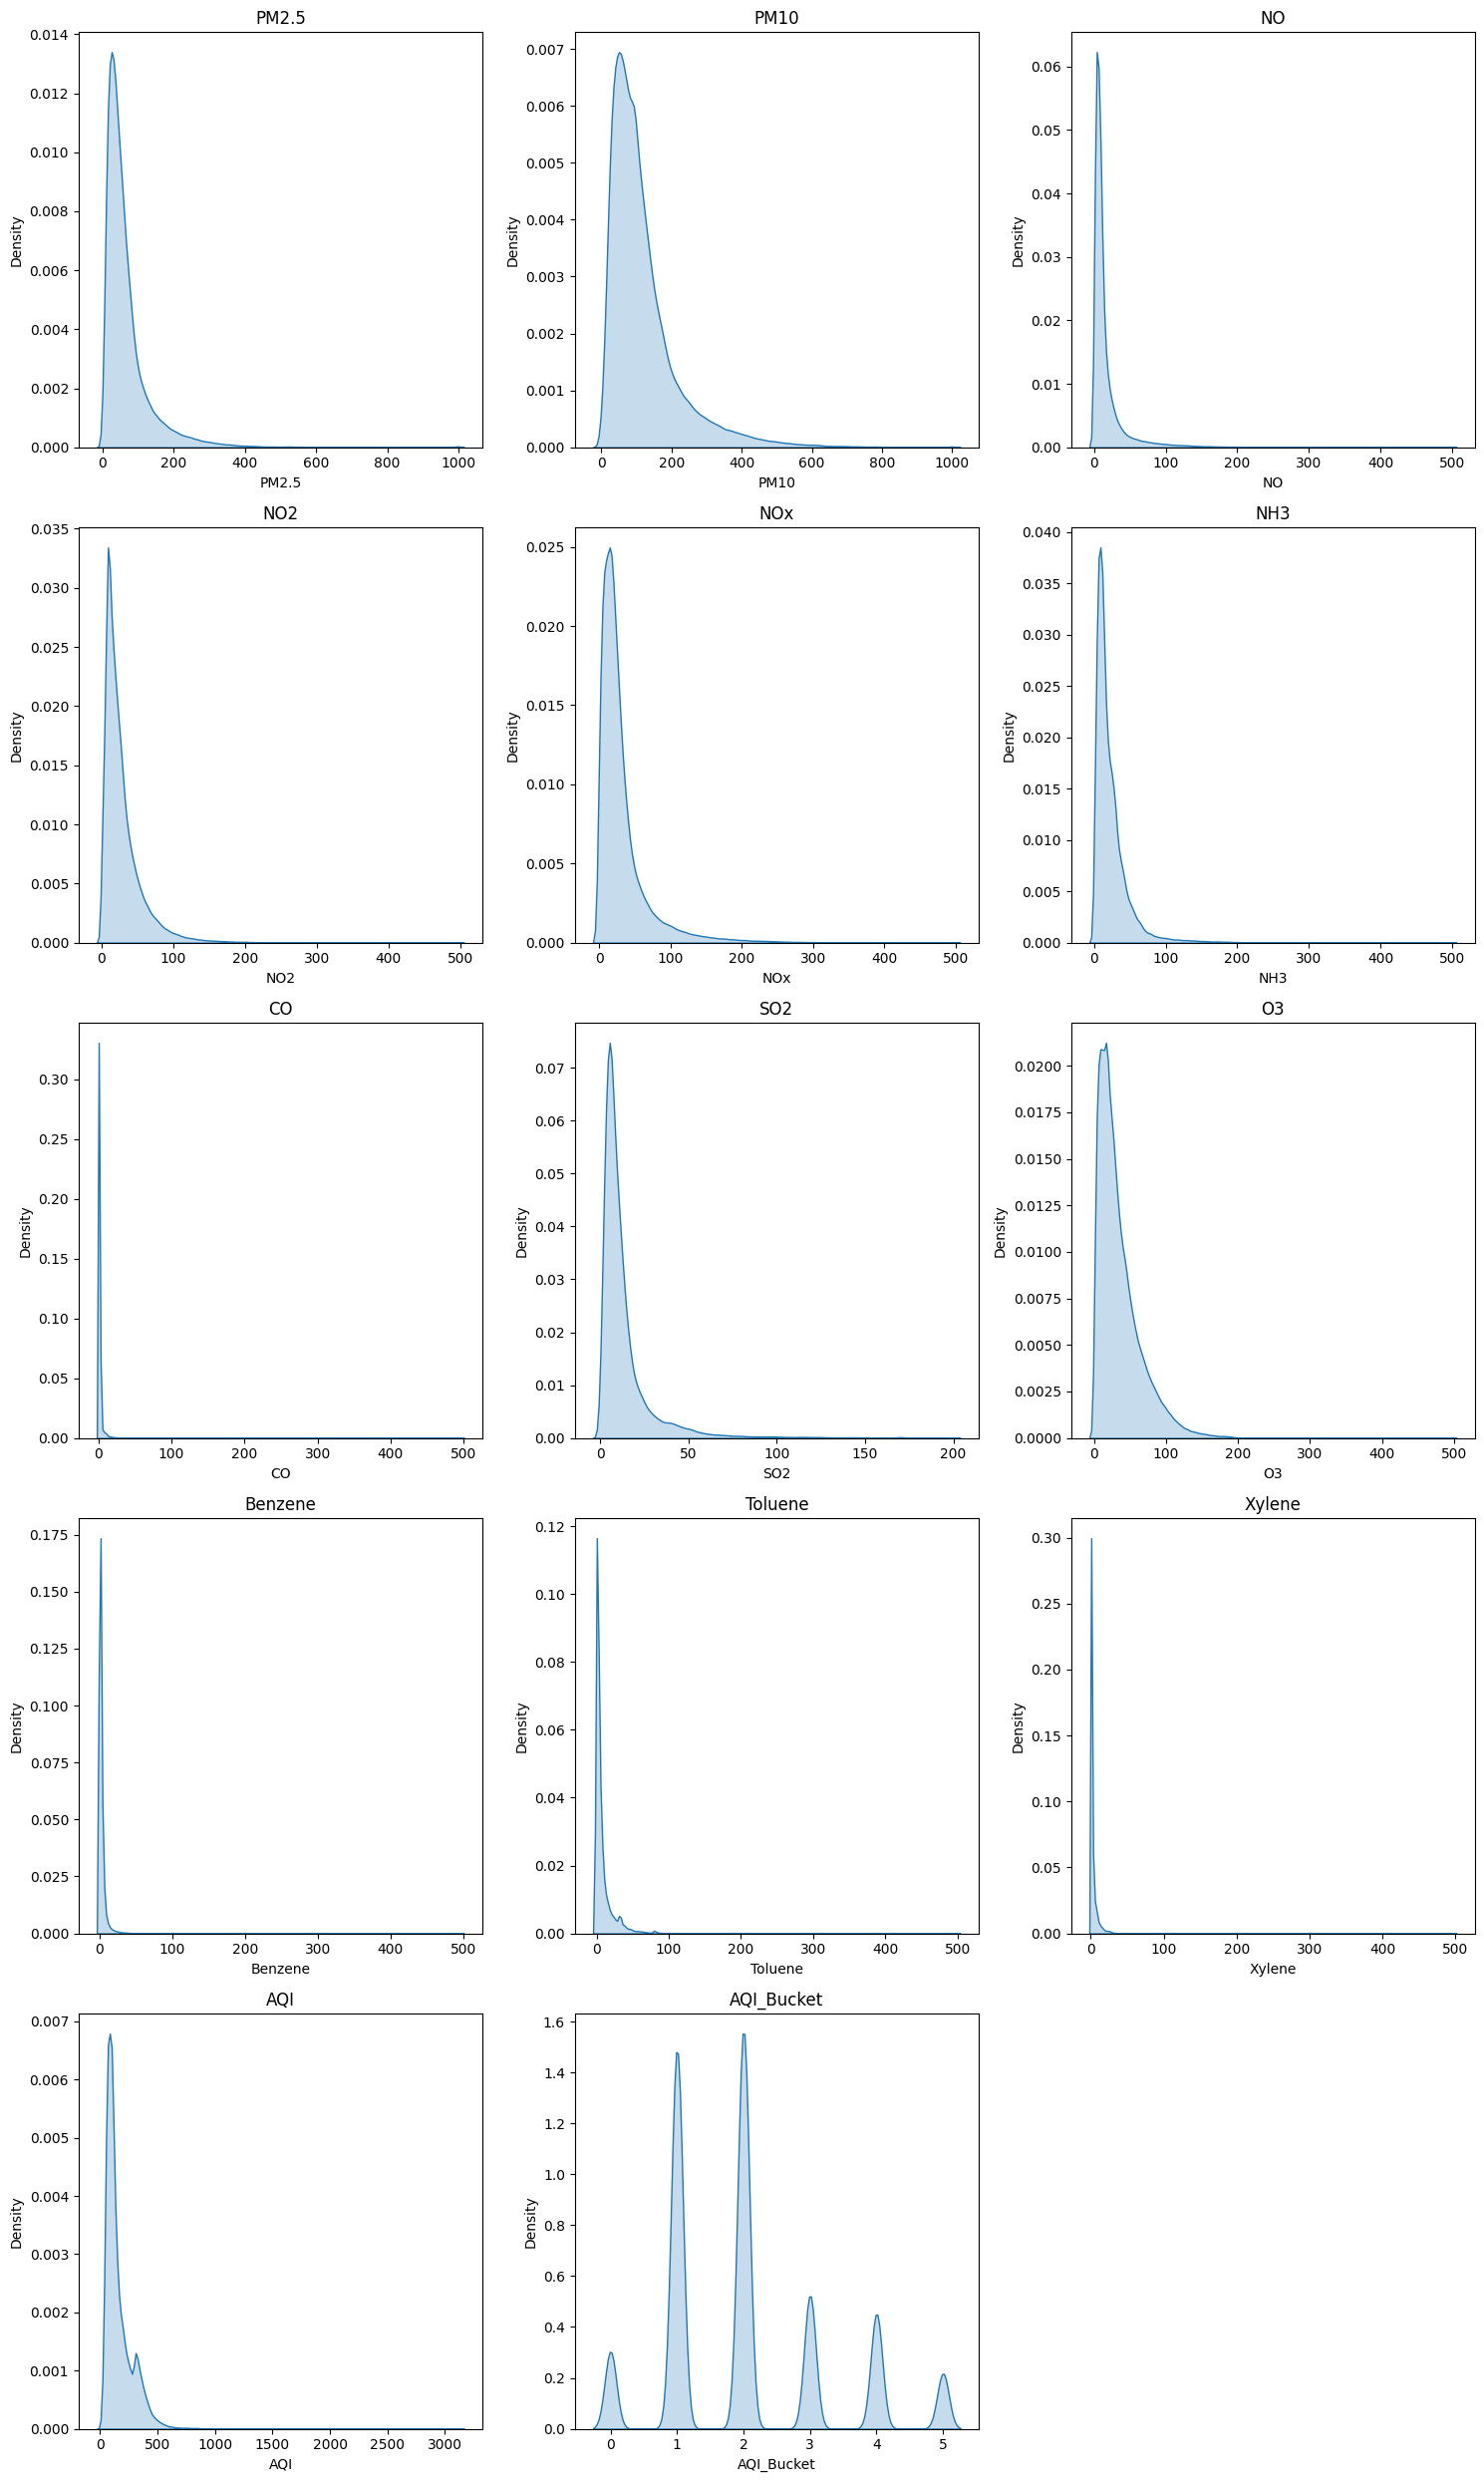

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Drop the 'Datetime' column if present (since KDE plot is not applicable for datetime data)
if 'Datetime' and 'City' in df_copy.columns:
    df_copy = df_copy.drop(['Datetime', 'City'], axis=1)


# Generate KDE plots for all columns
num_columns = len(df_copy.columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(df_copy.columns):
    plt.subplot(num_rows, 3, i + 1)  # Adjust subplot position
    sns.kdeplot(df_copy[column], shade=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [231]:
# import missingno as msno
# msno.heatmap(df_copy)

<Axes: >

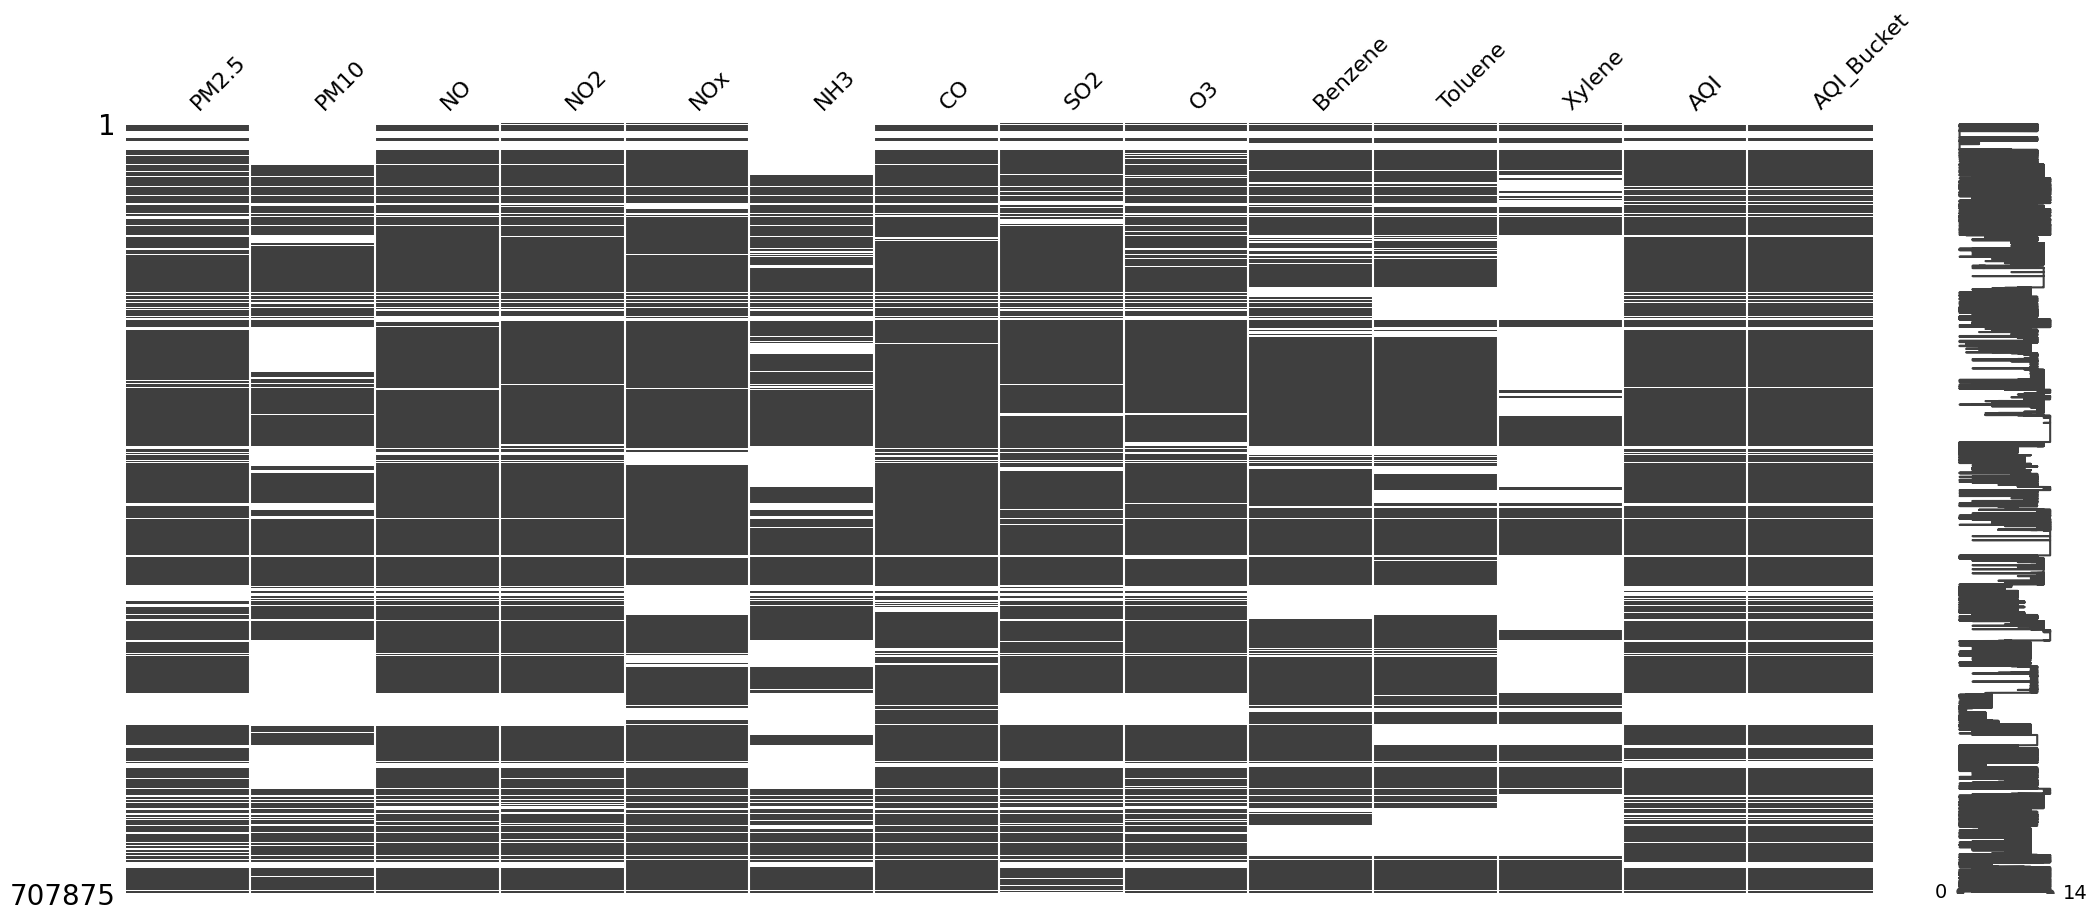

In [27]:
msno.matrix(df_copy)

In [28]:
df_copy.isnull().sum()


PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

IMPUTATION USING 'MEDIAN' STRATEGY AGAINST EACH FEATURE

In [29]:
from sklearn.impute import SimpleImputer

SELECTING ONLY A SUBSET OF COLUMNS(POLLUTANTS) THAT HAVE MISSING VALUES AND STORING THEM IN A NEW DATAFRAME CONTAINING ONLY THOSE SELECTED COLUMNS.

In [30]:
cols = ['PM2.5','PM10','NO','NO2', 'NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

df_c_imp = df_copy[cols]
df_c_imp

PM2.5   PM10    NO    NO2    NOx   NH3    CO     SO2      O3  Benzene  \
0         NaN    NaN  1.00  40.01  36.37   NaN  1.00  122.07     NaN      0.0   
1         NaN    NaN  0.02  27.75  19.73   NaN  0.02   85.90     NaN      0.0   
2         NaN    NaN  0.08  19.32  11.08   NaN  0.08   52.83     NaN      0.0   
3         NaN    NaN  0.30  16.45   9.20   NaN  0.30   39.53  153.58      0.0   
4         NaN    NaN  0.12  14.90   7.85   NaN  0.12   32.63     NaN      0.0   
...       ...    ...   ...    ...    ...   ...   ...     ...     ...      ...   
707870   9.50  36.00  2.75  25.57  15.85  4.57  0.62     NaN   27.75      NaN   
707871  17.25  49.25  3.62  33.20  20.62  3.78  0.76    2.02   25.58      NaN   
707872  36.00  71.00  2.20  30.80  18.20  3.67  0.58    1.77   26.15      NaN   
707873  15.75  63.00  1.02  28.90  16.00  3.80  0.49    0.75   15.82      NaN   
707874  15.00  66.00  0.40  26.85  14.05  5.20  0.59    2.10   17.05      NaN   

        Toluene  Xylene   AQI  AQI_Bucket  
0           0.0     0.0   NaN         NaN  
1           0.0     0.0   NaN         NaN  
2           0.0     0.0   NaN         NaN  
3           0.0     0.0   NaN         NaN  
4           0.0     0.0   NaN         NaN  
...         ...     ...   ...         ...  
707870      NaN     NaN  51.0         1.0  
707871      NaN     NaN  51.0         1.0  
707872      NaN     NaN  50.0         0.0  
707873      NaN     NaN  50.0         0.0  
707874      NaN     NaN  50.0         0.0  

[707875 rows x 14 columns]

In [32]:
from sklearn.impute import SimpleImputer

# Create a copy of the original DataFrame conatining only selected columns
df_imputed = df_c_imp.copy()

# Create a SimpleImputer instance with strategy='median'
imputer = SimpleImputer(strategy='median')

# Iterate over each column in the DataFrame and impute missing values with the median of that column
for column in df_imputed.columns:
    # Reshape the column to a 2D array as SimpleImputer expects 2D input
    column_data = df_imputed[column].values.reshape(-1, 1)

    # Impute missing values for the column
    imputed_column_data = imputer.fit_transform(column_data)

    # Replace the original column in the copied DataFrame with the imputed column
    df_imputed[column] = imputed_column_data

# Display the imputed DataFrame
(df_imputed)

PM2.5   PM10    NO    NO2    NOx    NH3    CO     SO2      O3  \
0       46.42  91.50  1.00  40.01  36.37  15.38  1.00  122.07   26.24   
1       46.42  91.50  0.02  27.75  19.73  15.38  0.02   85.90   26.24   
2       46.42  91.50  0.08  19.32  11.08  15.38  0.08   52.83   26.24   
3       46.42  91.50  0.30  16.45   9.20  15.38  0.30   39.53  153.58   
4       46.42  91.50  0.12  14.90   7.85  15.38  0.12   32.63   26.24   
...       ...    ...   ...    ...    ...    ...   ...     ...     ...   
707870   9.50  36.00  2.75  25.57  15.85   4.57  0.62    8.37   27.75   
707871  17.25  49.25  3.62  33.20  20.62   3.78  0.76    2.02   25.58   
707872  36.00  71.00  2.20  30.80  18.20   3.67  0.58    1.77   26.15   
707873  15.75  63.00  1.02  28.90  16.00   3.80  0.49    0.75   15.82   
707874  15.00  66.00  0.40  26.85  14.05   5.20  0.59    2.10   17.05   

        Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0          0.00     0.00    0.00  116.0         2.0  
1          0.00     0.00    0.00  116.0         2.0  
2          0.00     0.00    0.00  116.0         2.0  
3          0.00     0.00    0.00  116.0         2.0  
4          0.00     0.00    0.00  116.0         2.0  
...         ...      ...     ...    ...         ...  
707870     0.86     2.59    0.79   51.0         1.0  
707871     0.86     2.59    0.79   51.0         1.0  
707872     0.86     2.59    0.79   50.0         0.0  
707873     0.86     2.59    0.79   50.0         0.0  
707874     0.86     2.59    0.79   50.0         0.0  

[707875 rows x 14 columns]

In [33]:
df_imputed.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [35]:
# Extract 'City' and 'Datetime' columns from the original DataFrame
city_datetime = df[['City', 'Datetime']]

# Create a DataFrame using the imputed data and columns from df_c_imp
df2 = pd.DataFrame(df_imputed, columns=cols)

# Concatenate 'City' and 'Datetime' columns with the imputed DataFrame
df_imputed_combined = pd.concat([city_datetime, df2], axis=1)

# Display the new DataFrame
df_imputed_combined


City            Datetime  PM2.5   PM10    NO    NO2    NOx  \
0           Ahmedabad 2015-01-01 01:00:00  46.42  91.50  1.00  40.01  36.37   
1           Ahmedabad 2015-01-01 02:00:00  46.42  91.50  0.02  27.75  19.73   
2           Ahmedabad 2015-01-01 03:00:00  46.42  91.50  0.08  19.32  11.08   
3           Ahmedabad 2015-01-01 04:00:00  46.42  91.50  0.30  16.45   9.20   
4           Ahmedabad 2015-01-01 05:00:00  46.42  91.50  0.12  14.90   7.85   
...               ...                 ...    ...    ...   ...    ...    ...   
707870  Visakhapatnam 2020-06-30 20:00:00   9.50  36.00  2.75  25.57  15.85   
707871  Visakhapatnam 2020-06-30 21:00:00  17.25  49.25  3.62  33.20  20.62   
707872  Visakhapatnam 2020-06-30 22:00:00  36.00  71.00  2.20  30.80  18.20   
707873  Visakhapatnam 2020-06-30 23:00:00  15.75  63.00  1.02  28.90  16.00   
707874  Visakhapatnam 2020-07-01 00:00:00  15.00  66.00  0.40  26.85  14.05   

          NH3    CO     SO2      O3  Benzene  Toluene  Xylene    AQI  \
0       15.38  1.00  122.07   26.24     0.00     0.00    0.00  116.0   
1       15.38  0.02   85.90   26.24     0.00     0.00    0.00  116.0   
2       15.38  0.08   52.83   26.24     0.00     0.00    0.00  116.0   
3       15.38  0.30   39.53  153.58     0.00     0.00    0.00  116.0   
4       15.38  0.12   32.63   26.24     0.00     0.00    0.00  116.0   
...       ...   ...     ...     ...      ...      ...     ...    ...   
707870   4.57  0.62    8.37   27.75     0.86     2.59    0.79   51.0   
707871   3.78  0.76    2.02   25.58     0.86     2.59    0.79   51.0   
707872   3.67  0.58    1.77   26.15     0.86     2.59    0.79   50.0   
707873   3.80  0.49    0.75   15.82     0.86     2.59    0.79   50.0   
707874   5.20  0.59    2.10   17.05     0.86     2.59    0.79   50.0   

        AQI_Bucket  
0              2.0  
1              2.0  
2              2.0  
3              2.0  
4              2.0  
...            ...  
707870         1.0  
707871         1.0  
707872         0.0  
707873         0.0  
707874         0.0  

[707875 rows x 16 columns]

In [36]:
df_imputed_combined.tail()

City            Datetime  PM2.5   PM10    NO    NO2    NOx  \
707870  Visakhapatnam 2020-06-30 20:00:00   9.50  36.00  2.75  25.57  15.85   
707871  Visakhapatnam 2020-06-30 21:00:00  17.25  49.25  3.62  33.20  20.62   
707872  Visakhapatnam 2020-06-30 22:00:00  36.00  71.00  2.20  30.80  18.20   
707873  Visakhapatnam 2020-06-30 23:00:00  15.75  63.00  1.02  28.90  16.00   
707874  Visakhapatnam 2020-07-01 00:00:00  15.00  66.00  0.40  26.85  14.05   

         NH3    CO   SO2     O3  Benzene  Toluene  Xylene   AQI  AQI_Bucket  
707870  4.57  0.62  8.37  27.75     0.86     2.59    0.79  51.0         1.0  
707871  3.78  0.76  2.02  25.58     0.86     2.59    0.79  51.0         1.0  
707872  3.67  0.58  1.77  26.15     0.86     2.59    0.79  50.0         0.0  
707873  3.80  0.49  0.75  15.82     0.86     2.59    0.79  50.0         0.0  
707874  5.20  0.59  2.10  17.05     0.86     2.59    0.79  50.0         0.0

In [37]:
df_imputed_combined['Datetime'] = pd.to_datetime(df_imputed_combined['Datetime'])

In [38]:
df_imputed_combined.head()

City            Datetime  PM2.5  PM10    NO    NO2    NOx    NH3  \
0  Ahmedabad 2015-01-01 01:00:00  46.42  91.5  1.00  40.01  36.37  15.38   
1  Ahmedabad 2015-01-01 02:00:00  46.42  91.5  0.02  27.75  19.73  15.38   
2  Ahmedabad 2015-01-01 03:00:00  46.42  91.5  0.08  19.32  11.08  15.38   
3  Ahmedabad 2015-01-01 04:00:00  46.42  91.5  0.30  16.45   9.20  15.38   
4  Ahmedabad 2015-01-01 05:00:00  46.42  91.5  0.12  14.90   7.85  15.38   

     CO     SO2      O3  Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0  1.00  122.07   26.24      0.0      0.0     0.0  116.0         2.0  
1  0.02   85.90   26.24      0.0      0.0     0.0  116.0         2.0  
2  0.08   52.83   26.24      0.0      0.0     0.0  116.0         2.0  
3  0.30   39.53  153.58      0.0      0.0     0.0  116.0         2.0  
4  0.12   32.63   26.24      0.0      0.0     0.0  116.0         2.0

In [39]:
df_imputed_combined.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [40]:
df_imputed_combined.describe()

Datetime          PM2.5           PM10  \
count                         707875  707875.000000  707875.000000   
mean   2018-05-14 02:41:03.445098752      63.277170     107.516191   
min              2015-01-01 01:00:00       0.010000       0.010000   
25%              2017-04-15 23:00:00      30.980000      79.570000   
50%              2018-08-04 20:00:00      46.420000      91.500000   
75%              2019-09-02 14:00:00      68.240000     102.830000   
max              2020-07-01 00:00:00     999.990000    1000.000000   
std                              NaN      67.180795      80.587300   

                  NO            NO2            NOx            NH3  \
count  707875.000000  707875.000000  707875.000000  707875.000000   
mean       15.862803      27.468002      30.286116      20.440077   
min         0.010000       0.010000       0.000000       0.010000   
25%         4.570000      12.420000      12.820000      12.270000   
50%         7.960000      20.320000      20.790000      15.380000   
75%        13.340000      31.850000      32.270000      19.680000   
max       499.990000     499.510000     498.610000     499.970000   
std        29.541480      26.830097      36.393065      22.962005   

                  CO            SO2             O3        Benzene  \
count  707875.000000  707875.000000  707875.000000  707875.000000   
mean        2.014442      12.994346      33.236714       2.572621   
min         0.000000       0.010000       0.010000       0.000000   
25%         0.480000       5.560000      16.150000       0.200000   
50%         0.800000       8.370000      26.240000       0.860000   
75%         1.250000      12.740000      41.500000       2.000000   
max       498.570000     199.960000     497.620000     498.070000   
std        10.288245      17.575227      27.151205      14.460070   

             Toluene         Xylene            AQI     AQI_Bucket  
count  707875.000000  707875.000000  707875.000000  707875.000000  
mean        6.768942       1.623372     157.220670       1.996974  
min         0.000000       0.000000       8.000000       0.000000  
25%         1.150000       0.790000      87.000000       1.000000  
50%         2.590000       0.790000     116.000000       2.000000  
75%         5.030000       0.790000     177.000000       2.000000  
max       499.400000     499.990000    3133.000000       5.000000  
std        18.255729       4.807554     147.875781       1.120781

CHECKING THE DISTRIBUTION OF THE DATA BY KDE PLOTS

<ipython-input-41-6561fba1af1f>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-41-6561fba1af1f>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-41-6561fba1af1f>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-41-6561fba1af1f>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-41-6561fba1af1f>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-41-6561fba1af1f

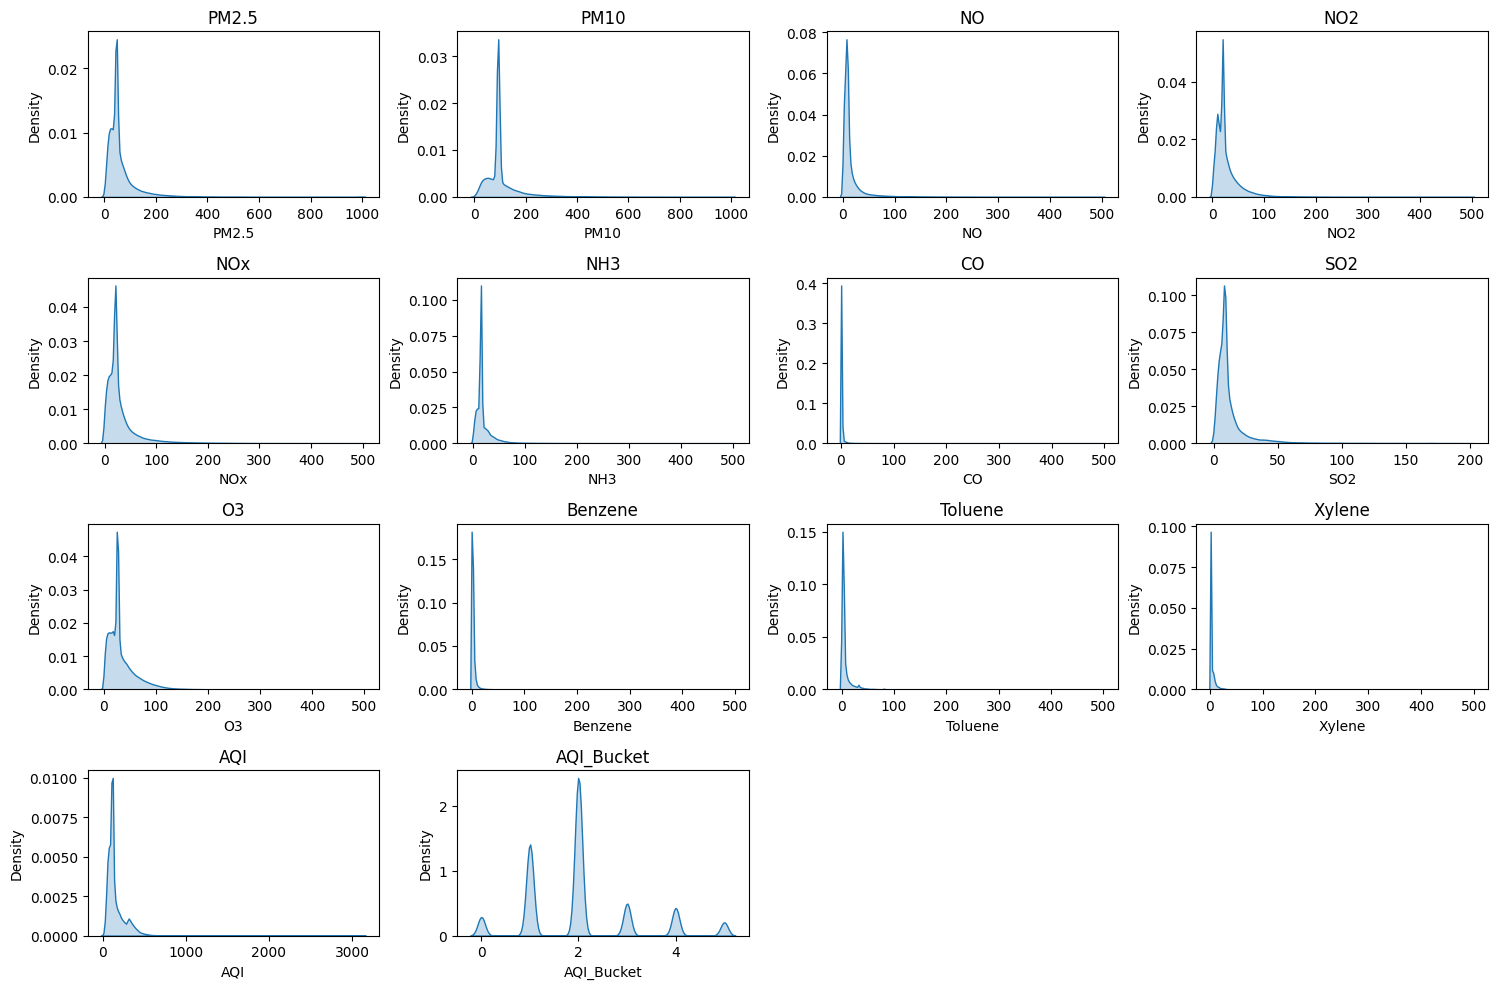

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numeric columns for which KDE plots will be generated
numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

# Set the figure size
plt.figure(figsize=(15, 10))

# Generate KDE plots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df_imputed_combined[column], shade=True)
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()


LOG TRANSFORMATION FIRST ON TOP FOUR MOST RIGHT SKEWED FATURES

In [44]:
import seaborn as sns

# Select pollutant columns
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

for col in pollutant_columns:
    # Calculate skewness
    skewness = df_imputed_combined[col].skew()
    print(f"{col}: Skewness = {skewness}")



PM2.5: Skewness = 4.899162441983868
PM10: Skewness = 3.568481806980674
NO: Skewness = 5.920662071453468
NO2: Skewness = 3.735845899029729
NOx: Skewness = 4.130679874437676
NH3: Skewness = 6.783176023603276
CO: Skewness = 22.241697754495778
SO2: Skewness = 4.969662701910261
O3: Skewness = 1.9986560094664805
Benzene: Skewness = 25.617775774371207
Toluene: Skewness = 13.66495213302052
Xylene: Skewness = 21.9998649188687
AQI: Skewness = 7.054021952373052


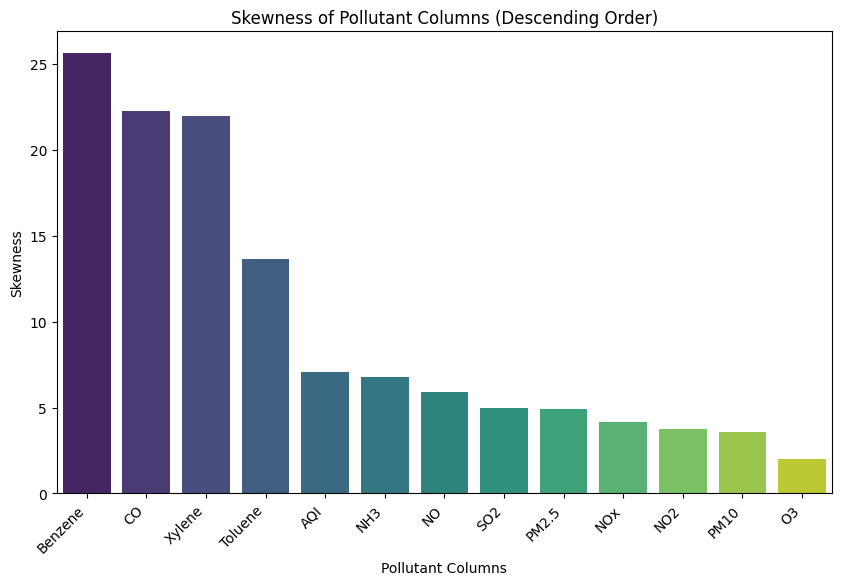

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select pollutant columns
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Calculate skewness of each pollutant column
skewness_values = {col: df_imputed_combined[col].skew() for col in pollutant_columns}

# Sort the skewness values in descending order
sorted_skewness = sorted(skewness_values.items(), key=lambda x: x[1], reverse=True)

# Extract sorted columns and skewness values
sorted_columns = [item[0] for item in sorted_skewness]
sorted_skewness_values = [item[1] for item in sorted_skewness]

# Create a bar plot for skewness of pollutant columns
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_columns, y=sorted_skewness_values, hue=sorted_columns, dodge=False, palette='viridis')

# Add labels and title
plt.xlabel('Pollutant Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Pollutant Columns (Descending Order)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()



In [47]:
# Make a copy of the DataFrame
df_logtransform = df_imputed_combined.copy()

# List of skewed features
skewed_features = ['Benzene', 'CO', 'Xylene', 'Toluene']

# Apply logarithmic transformation to skewed features
for feature in skewed_features:
    df_logtransform [feature] = np.log1p(df_logtransform[feature])

# Display the transformed DataFrame
df_logtransform.head()




City            Datetime  PM2.5  PM10    NO    NO2    NOx    NH3  \
0  Ahmedabad 2015-01-01 01:00:00  46.42  91.5  1.00  40.01  36.37  15.38   
1  Ahmedabad 2015-01-01 02:00:00  46.42  91.5  0.02  27.75  19.73  15.38   
2  Ahmedabad 2015-01-01 03:00:00  46.42  91.5  0.08  19.32  11.08  15.38   
3  Ahmedabad 2015-01-01 04:00:00  46.42  91.5  0.30  16.45   9.20  15.38   
4  Ahmedabad 2015-01-01 05:00:00  46.42  91.5  0.12  14.90   7.85  15.38   

         CO     SO2      O3  Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0  0.693147  122.07   26.24      0.0      0.0     0.0  116.0         2.0  
1  0.019803   85.90   26.24      0.0      0.0     0.0  116.0         2.0  
2  0.076961   52.83   26.24      0.0      0.0     0.0  116.0         2.0  
3  0.262364   39.53  153.58      0.0      0.0     0.0  116.0         2.0  
4  0.113329   32.63   26.24      0.0      0.0     0.0  116.0         2.0

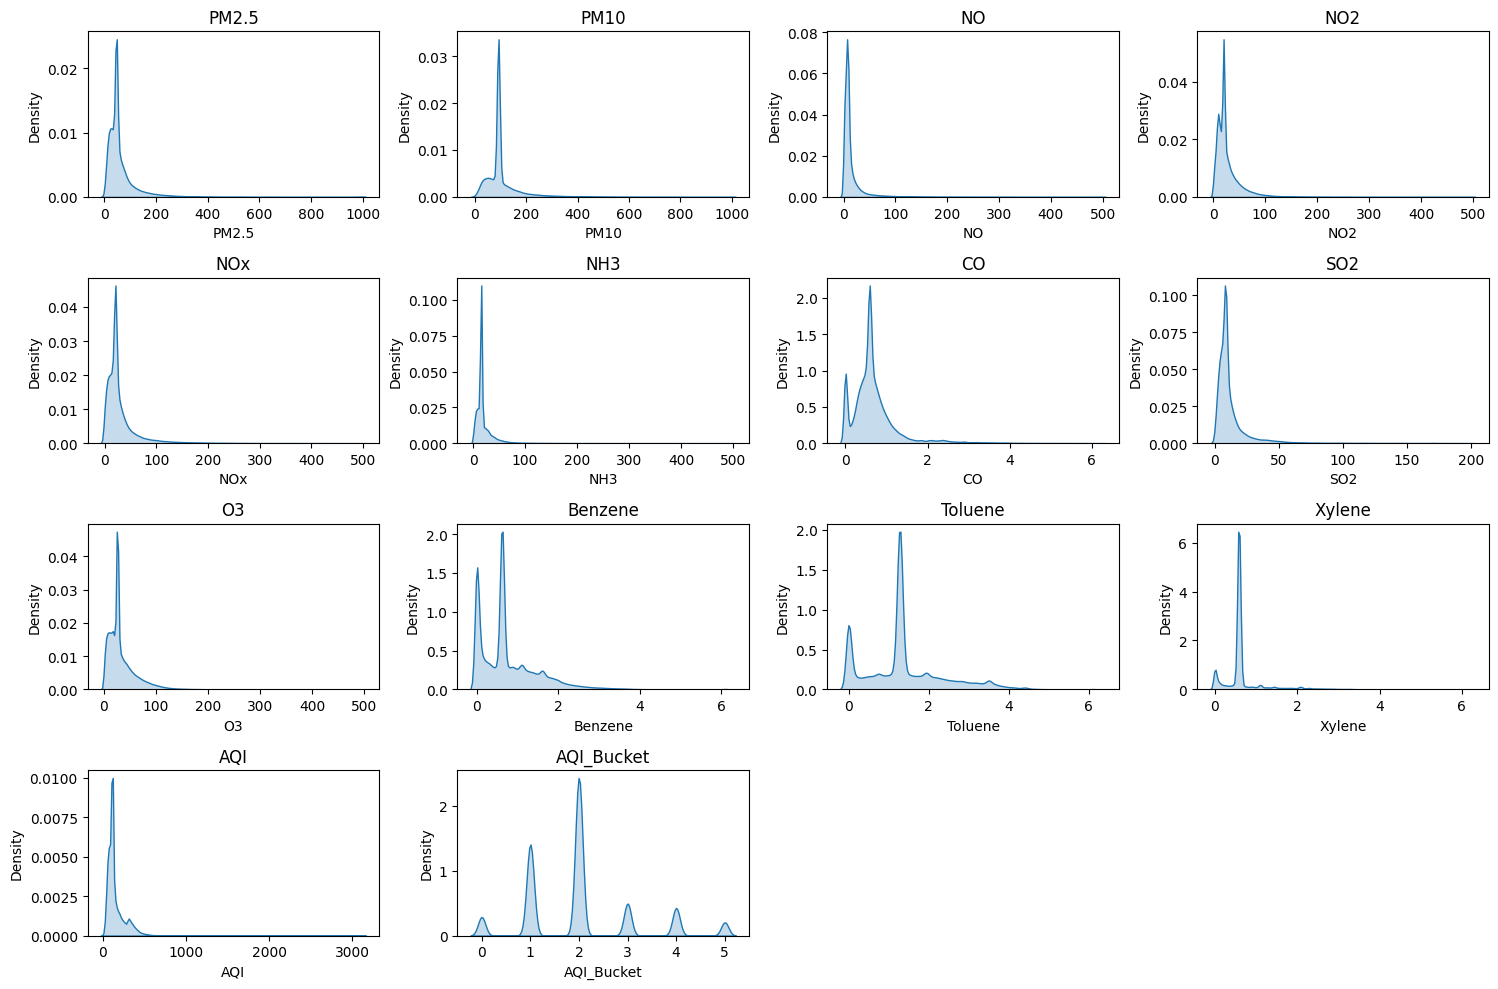

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filter numeric columns
numeric_columns = df_logtransform.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(15, 10))

# Generate KDE plots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df_logtransform[column], fill=True)
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()


NORMALIZATION OF THE DATA USING ROBUST SCALAR TO BRING ALL THE VARIABLES TO A STANDARD SCALE

In [264]:
# from sklearn.preprocessing import RobustScaler
# import pandas as pd

# # Create a copy of the DataFrame
# df_scaled = df_imputed_combined.copy()

# # List of numeric columns for robust scaling
# numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

# # Initialize RobustScaler
# scaler = RobustScaler()

# # Apply robust scaling to numeric columns
# df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# # Display the first few rows of the scaled DataFrame
# print(df_scaled.head())


In [265]:
#df_scaled.tail()

In [266]:
#df_scaled.describe()

In [267]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Filter numeric columns
# numeric_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# # Set the figure size
# plt.figure(figsize=(15, 10))

# # Generate KDE plots for each numeric column
# for i, column in enumerate(numeric_columns, 1):
#     plt.subplot(4, 4, i)
#     sns.kdeplot(df_scaled[column], shade=True)
#     plt.title(column)

# # Adjust layout
# plt.tight_layout()
# plt.show()



NORMALIZATION OF THE DATA USING STANDARD SCALAR ON 'df_logtransform'
```



In [49]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a copy of the DataFrame
df_standard_scalar = df_logtransform.copy()

# List of numeric columns for standardization
numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to numeric columns
df_standard_scalar[numeric_columns] = scaler.fit_transform(df_standard_scalar[numeric_columns])


In [50]:
df_standard_scalar.describe()

Datetime         PM2.5          PM10  \
count                         707875  7.078750e+05  7.078750e+05   
mean   2018-05-14 02:41:03.445098752  1.695968e-16 -2.200261e-16   
min              2015-01-01 01:00:00 -9.417455e-01 -1.334035e+00   
25%              2017-04-15 23:00:00 -4.807504e-01 -3.467818e-01   
50%              2018-08-04 20:00:00 -2.509226e-01 -1.987435e-01   
75%              2019-09-02 14:00:00  7.387280e-02 -5.815053e-02   
max              2020-07-01 00:00:00  1.394317e+01  1.107475e+01   
std                              NaN  1.000001e+00  1.000001e+00   

                 NO           NO2           NOx           NH3            CO  \
count  7.078750e+05  7.078750e+05  7.078750e+05  7.078750e+05  7.078750e+05   
mean  -1.156341e-17  2.071377e-16  1.092100e-17 -8.884557e-16 -3.950833e-17   
min   -5.366290e-01 -1.023404e+00 -8.321953e-01 -8.897347e-01 -1.144998e+00   
25%   -3.822696e-01 -5.608632e-01 -4.799301e-01 -3.558088e-01 -4.934950e-01   
50%   -2.675157e-01 -2.664175e-01 -2.609322e-01 -2.203675e-01 -1.682028e-01   
75%   -8.539873e-02  1.633241e-01  5.451274e-02 -3.310153e-02  2.026216e-01   
max    1.638806e+01  1.759376e+01  1.286850e+01  2.088364e+01  9.181131e+00   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   

                SO2            O3       Benzene       Toluene        Xylene  \
count  7.078750e+05  7.078750e+05  7.078750e+05  7.078750e+05  7.078750e+05   
mean   2.494164e-16  9.250732e-17 -1.686331e-16  4.509732e-16  4.235101e-16   
min   -7.387873e-01 -1.223767e+00 -1.042915e+00 -1.380562e+00 -1.234515e+00   
25%   -4.230017e-01 -6.293174e-01 -7.960492e-01 -6.153701e-01 -1.864917e-01   
50%   -2.631175e-01 -2.576946e-01 -2.026463e-01 -1.028704e-01 -1.864917e-01   
75%   -1.447186e-02  3.043435e-01  4.446203e-01  4.155375e-01 -1.864917e-01   
max    1.063803e+01  1.710361e+01  7.369224e+00  4.832606e+00  9.955713e+00   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   

                AQI    AQI_Bucket  
count  7.078750e+05  7.078750e+05  
mean  -2.858733e-17  9.250732e-17  
min   -1.009095e+00 -1.781772e+00  
25%   -4.748629e-01 -8.895360e-01  
50%   -2.787522e-01  2.699868e-03  
75%    1.337565e-01  2.699868e-03  
max    2.012352e+01  2.679407e+00  
std    1.000001e+00  1.000001e+00

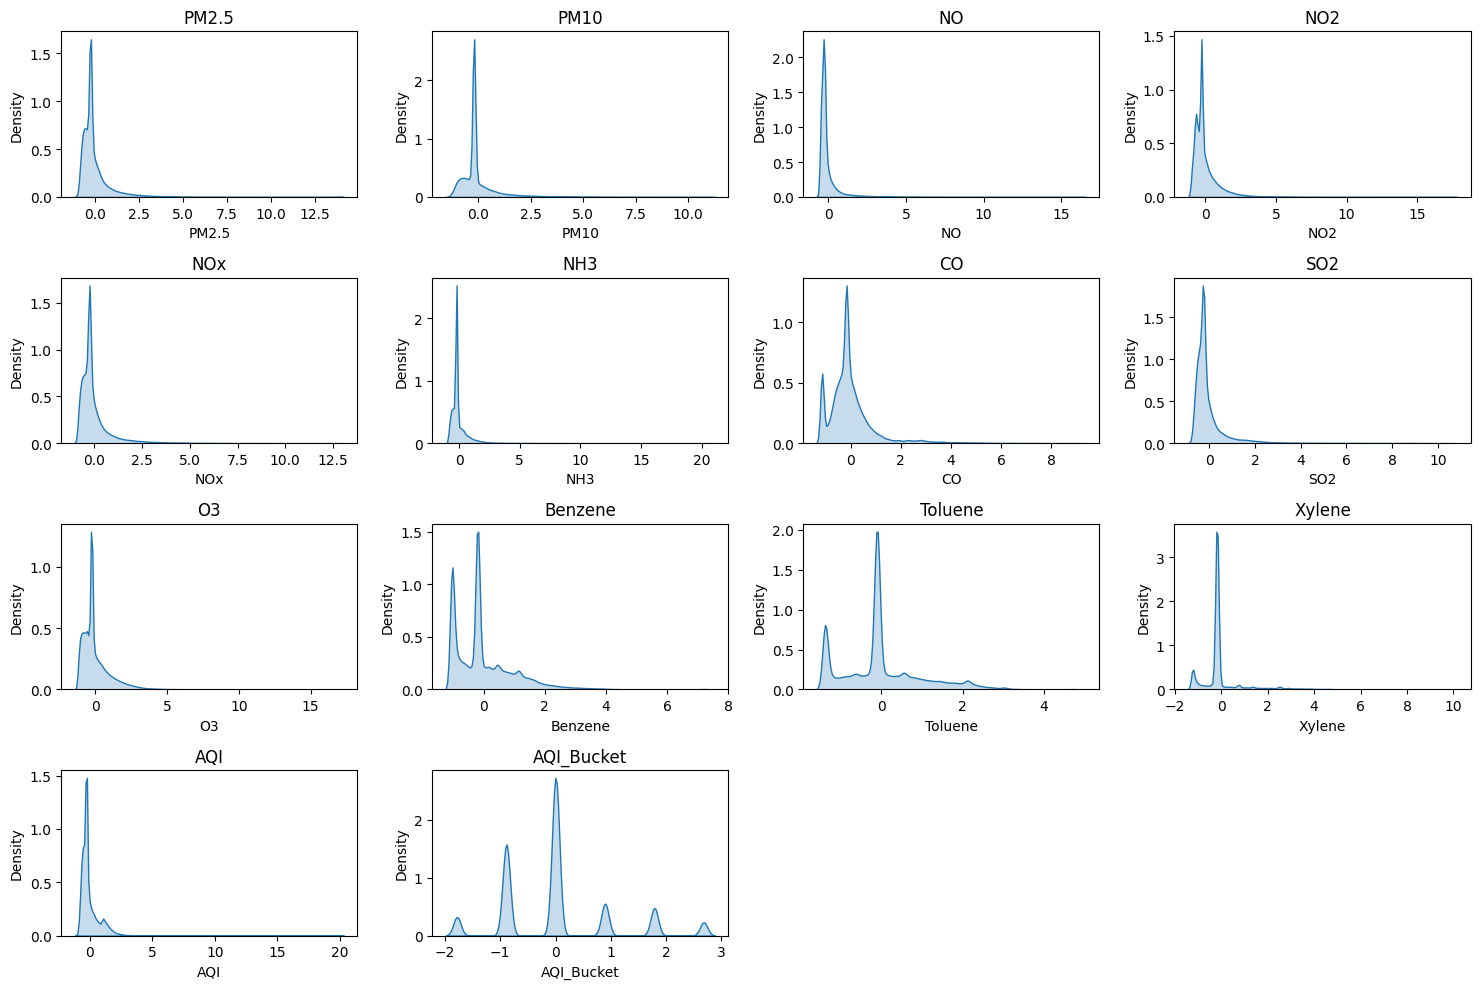

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_columns = df_standard_scalar.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(15, 10))

# Generate KDE plots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df_standard_scalar[column], fill=True)
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()


VISUALIZING OUTLIERS IN DATA FRAME 'df_imputed_combined' (not standardized)

In [43]:
# import pandas as pd

# # Create a copy of the DataFrame
# df_outliers = df_imputed_combined.copy()

# # Extract the year from the 'Datetime' column and add it as a separate feature
# df_outliers['Year'] = pd.to_datetime(df_outliers['Datetime']).dt.year
# df_outliers['Month']= pd.to_datetime(df_outliers['Datetime']).dt.month
# df_outliers['Day']= pd.to_datetime(df_outliers['Datetime']).dt.day
# df_outliers['Hour']= pd.to_datetime(df_outliers['Datetime']).dt.hour
# df_outliers['Minute']= pd.to_datetime(df_outliers['Datetime']).dt.minute
# df_outliers['Second']= pd.to_datetime(df_outliers['Datetime']).dt.second


# # Display the first few rows of the DataFrame to verify the changes
# df_outliers.head()


In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# # List of pollutant columns
# pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

# # Create separate scatter plots for each pollutant column for the years 2015-2020
# for column in pollutant_columns:
#     plt.figure(figsize=(9, 5))
#     sns.scatterplot(data=df_outliers, x='Year', y=column)
#     plt.title(f'Scatter plot of {column} for the years 2015-2020')
#     plt.xlabel('Year')
#     plt.ylabel(column)
#     plt.grid(True)
#     plt.show()


BOX PLOT FOR IMPUTED DATA

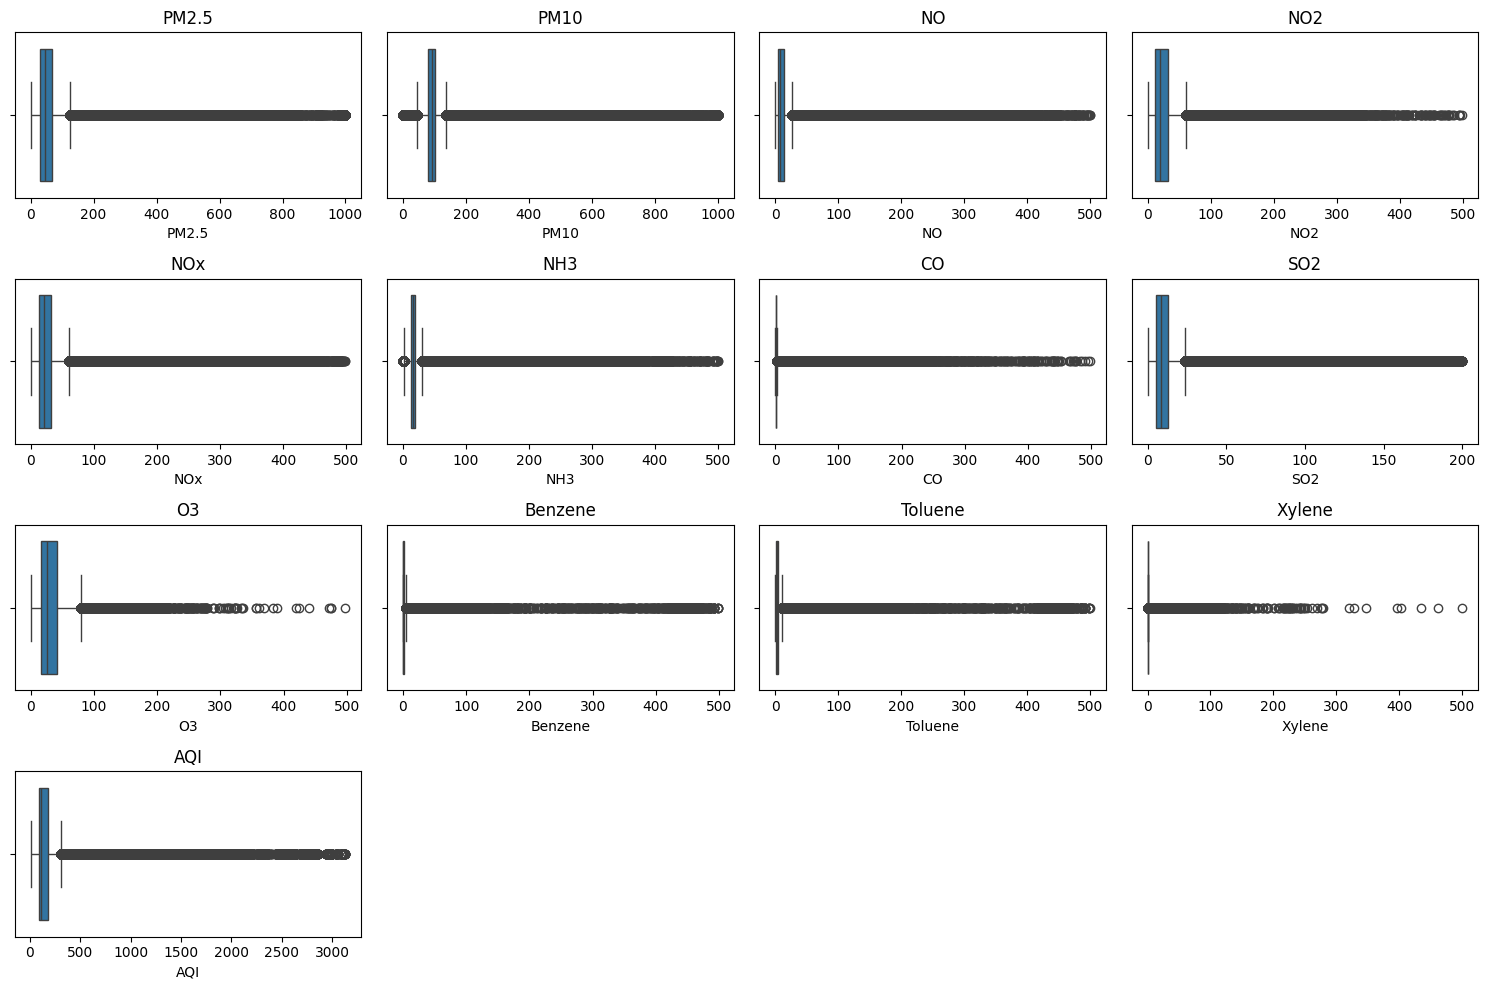

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set ithe figure size
plt.figure(figsize=(15, 10))

#pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
# Generate box plots for each pollutant column
for i, column in enumerate(pollutant_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_imputed_combined[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [275]:
# import pandas as pd

# # Create a copy of the DataFrame
# df_outliers1 = df_standard_scalar.copy()

# # Extract the year from the 'Datetime' column and add it as a separate feature
# df_outliers1['Year'] = pd.to_datetime(df_outliers1['Datetime']).dt.year

# # Display the first few rows of the DataFrame to verify the changes
# df_outliers1.head()


BOX PLOT FOR LOG TRANSFORMED AND STANDARDIZED DATA

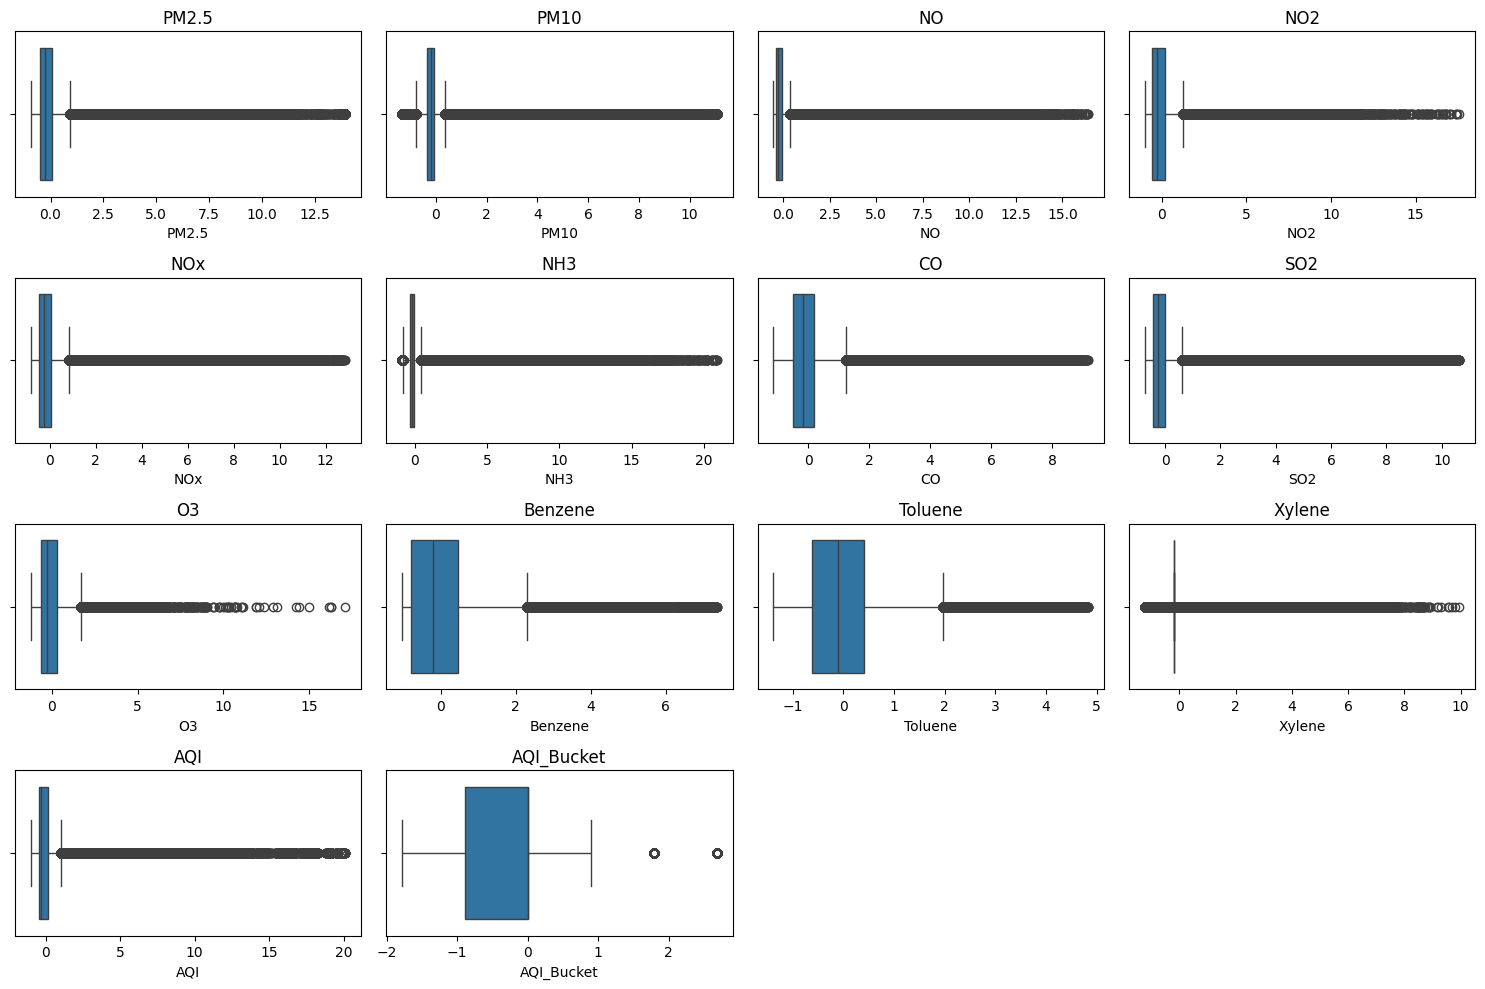

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
# Generate box plots for each pollutant column
for i, column in enumerate(pollutant_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_standard_scalar[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [90]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# from scipy.stats import zscore

# # Assuming df_imputed_combined is already defined and contains the necessary columns
# columns_to_inspect = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

# # Calculate the z-scores for each feature
# z_scores = df_imputed_combined[columns_to_inspect].apply(zscore)

# # Define a threshold for identifying outliers
# threshold = 2

# # Identify outliers
# outliers = (z_scores.abs() > threshold)

# # Display the outliers
# print("Outliers based on Z-Score Method:")
# print(outliers)

# # Plotting
# plt.figure(figsize=(20, 30))

# for i, column in enumerate(columns_to_inspect):
#     plt.subplot(len(columns_to_inspect), 1, i + 1)
#     sns.scatterplot(data=df_imputed_combined, x=df_imputed_combined.index, y=column, hue=outliers[column])
#     plt.title(f'Outliers in {column}')
#     plt.xlabel('Index')
#     plt.ylabel(column)

# plt.tight_layout()
# plt.show()


In [76]:
import pandas as pd


# Define the columns you want to include in the correlation analysis
columns_to_correlate = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

# Calculate the correlation matrix
correlation_matrix = df_standard_scalar[columns_to_correlate].corr()

# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.485818  0.368782  0.309429  0.335612  0.150141   
PM10        0.485818  1.000000  0.360678  0.321192  0.376907  0.178392   
NO          0.368782  0.360678  1.000000  0.418232  0.746006  0.141580   
NO2         0.309429  0.321192  0.418232  1.000000  0.570507  0.143886   
NOx         0.335612  0.376907  0.746006  0.570507  1.000000  0.130950   
NH3         0.150141  0.178392  0.141580  0.143886  0.130950  1.000000   
CO          0.217872  0.152066  0.305941  0.383476  0.330338  0.054646   
SO2         0.119959  0.149364  0.136730  0.291749  0.156940 -0.022803   
O3          0.062859  0.104583 -0.088440  0.070238 -0.054922  0.045811   
Benzene     0.200369  0.247069  0.256969  0.336492  0.296565  0.078356   
Toluene     0.217332  0.249617  0.217630  0.395655  0.264702  0.055815   
Xylene      0.114986  0.070333  0.140368  0.253481  0.153023 -0.027672   
AQI         0.488885  0.342090  0.336979  0.419183  0.349090  0.081022   
AQI_Bucket  0.604112  0.478663  0.306321  0.400386  0.344284  0.119688   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.217872  0.119959  0.062859  0.200369  0.217332  0.114986   
PM10        0.152066  0.149364  0.104583  0.247069  0.249617  0.070333   
NO          0.305941  0.136730 -0.088440  0.256969  0.217630  0.140368   
NO2         0.383476  0.291749  0.070238  0.336492  0.395655  0.253481   
NOx         0.330338  0.156940 -0.054922  0.296565  0.264702  0.153023   
NH3         0.054646 -0.022803  0.045811  0.078356  0.055815 -0.027672   
CO          1.000000  0.376161 -0.015432  0.270590  0.385706  0.243586   
SO2         0.376161  1.000000  0.103699  0.161871  0.273418  0.243862   
O3         -0.015432  0.103699  1.000000  0.055342  0.120422  0.031957   
Benzene     0.270590  0.161871  0.055342  1.000000  0.691201  0.488006   
Toluene     0.385706  0.273418  0.120422  0.691201  1.000000  0.462711   
Xylene      0.243586  0.243862  0.031957  0.488006  0.462711  1.000000   
AQI         0.534197  0.345680  0.100488  0.242301  0.322037  0.200754   
AQI_Bucket  0.452279  0.295027  0.165970  0.224329  0.307294  0.130313   

                 AQI  AQI_Bucket  
PM2.5       0.488885    0.604112  
PM10        0.342090    0.478663  
NO          0.336979    0.306321  
NO2         0.419183    0.400386  
NOx         0.349090    0.344284  
NH3         0.081022    0.119688  
CO          0.534197    0.452279  
SO2         0.345680    0.295027  
O3          0.100488    0.165970  
Benzene     0.242301    0.224329  
Toluene     0.322037    0.307294  
Xylene      0.200754    0.130313  
AQI         1.000000    0.765361  
AQI_Bucket  0.765361    1.000000

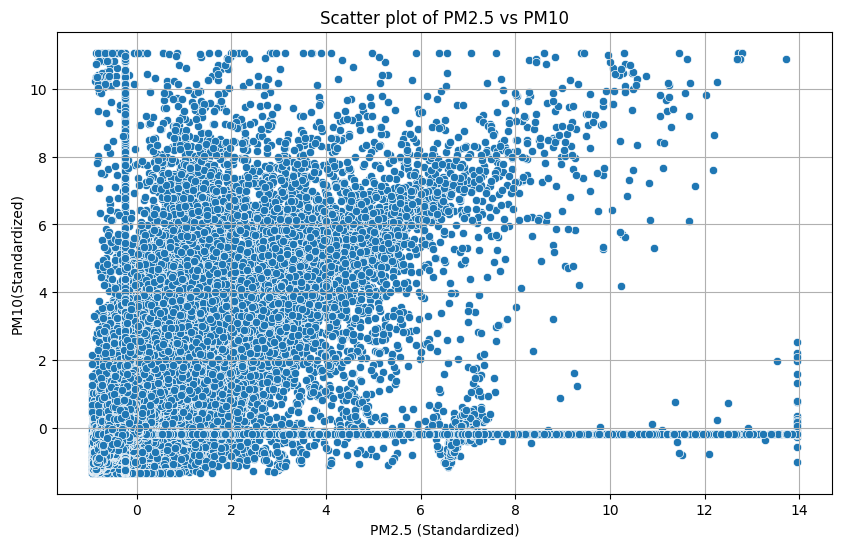

In [78]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Scatter plot to visualize the relationship between O3 and NO
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df_standard_scalar['PM2.5'], y=df_standard_scalar['PM10'])
# plt.title('Scatter plot of PM2.5 vs PM10')
# plt.xlabel('PM2.5 (Standardized)')
# plt.ylabel('PM10(Standardized)')
# plt.grid(True)
# plt.show()


In [284]:
# # Soham

# import pandas as pd
# import numpy as np

# # Create a copy of the original dataframe
# df_standardized_copy = df_standardized.copy()

# # Select only the numeric columns for outlier detection
# numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

# # Calculate the z-scores for each numeric column
# z_scores = df_standardized_copy[numeric_columns].apply(lambda x: np.abs((x - x.mean()) / x.std()))

# # Define the threshold for outlier detection
# threshold = 3

# # Find outliers based on the z-scores
# outliers = z_scores > threshold

# # Remove outliers from the original DataFrame
# #outliers_removed_df = df_standardized_copy[~outliers.any(axis=1)]

# # Merge back the 'city' and 'datetime' columns to the DataFrame without duplicates
# #df_standardized_copy = pd.merge(df_standardized_copy, df_standardized[['City', 'Datetime']], left_index=True, right_index=True, suffixes=('', '_original'))

# # Calculate the amount of data remaining after removal of outliers
# #outliers_data_percentage = (len(outliers) / len(df_standardized)) * 100
# #print(f"Percentage of outliers: {outliers_data_percentage:.2f}%")
# outliers

In [285]:
# import pandas as pd
# import numpy as np

# # Create a copy of the original dataframe
# df_standardized_copy = df_standardized[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']].copy()

# # Calculate the z-scores for each column
# z_scores = df_standardized_copy.apply(lambda x: np.abs((x - x.mean()) / x.std()))

# # Define the threshold for outlier detection
# threshold = 5

# # Find outliers based on the z-scores
# outliers = z_scores > threshold

# # Remove outliers from the copy of the dataframe
# outliers_removed_df = df_standardized_copy[~outliers.any(axis=1)]

# # Calculate the amount of data remaining after removal of outliers
# remaining_data_percentage = (len(outliers_removed_df) / len(df_standardized_copy)) * 100
# print(f"Percentage of remaining data after removal of outliers: {remaining_data_percentage:.2f}%")


In [286]:
#outliers_removed_df

FEATURE SELECTION USING CORRELATION ABOVE THRESHOLD VALUE OF 0.3

In [82]:
# Create a copy of the DataFrame 'df_standard_scalar'
df_selected_features = df_standard_scalar.copy()

# Drop the 'AQI_Bucket' column
df_selected_features = df_selected_features.drop('AQI_Bucket', axis=1)

# Select only the numeric columns for correlation analysis
numeric_columns = df_selected_features.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix between 'AQI' and other pollutants
correlation_matrix = df_selected_features[numeric_columns].corr()['AQI']

# Select features with correlation above the threshold value of 0.3
significant_features = correlation_matrix[abs(correlation_matrix) > 0.3].index

# Filter the DataFrame to include only significant features
df_selected_features = df_selected_features[significant_features]

# Display the selected features
print("Selected significant features based on correlation with AQI (excluding AQI_Bucket):")
print(df_selected_features.head())

Selected significant features based on correlation with AQI (excluding AQI_Bucket):
      PM2.5      PM10        NO       NO2       NOx        CO       SO2  \
0 -0.250923 -0.198743 -0.503117  0.467460  0.167172  0.006887  6.206220   
1 -0.250923 -0.198743 -0.536290  0.010511 -0.290059 -1.112090  4.148208   
2 -0.250923 -0.198743 -0.534259 -0.303689 -0.527741 -1.017103  2.266581   
3 -0.250923 -0.198743 -0.526812 -0.410659 -0.579400 -0.708996  1.509834   
4 -0.250923 -0.198743 -0.532905 -0.468430 -0.616495 -0.956666  1.117236   

    Toluene       AQI  
0 -1.380562 -0.278752  
1 -1.380562 -0.278752  
2 -1.380562 -0.278752  
3 -1.380562 -0.278752  
4 -1.380562 -0.278752  


In [84]:
df_selected_features

PM2.5      PM10        NO       NO2       NOx        CO       SO2  \
0      -0.250923 -0.198743 -0.503117  0.467460  0.167172  0.006887  6.206220   
1      -0.250923 -0.198743 -0.536290  0.010511 -0.290059 -1.112090  4.148208   
2      -0.250923 -0.198743 -0.534259 -0.303689 -0.527741 -1.017103  2.266581   
3      -0.250923 -0.198743 -0.526812 -0.410659 -0.579400 -0.708996  1.509834   
4      -0.250923 -0.198743 -0.532905 -0.468430 -0.616495 -0.956666  1.117236   
...          ...       ...       ...       ...       ...       ...       ...   
707870 -0.800485 -0.887438 -0.443878 -0.070742 -0.396672 -0.343293 -0.263117   
707871 -0.685124 -0.723020 -0.414428  0.213641 -0.265603 -0.205549 -0.624422   
707872 -0.406027 -0.453126 -0.462496  0.124189 -0.332100 -0.384841 -0.638646   
707873 -0.707452 -0.552397 -0.502440  0.053373 -0.392551 -0.482304 -0.696683   
707874 -0.718616 -0.515171 -0.523427 -0.023034 -0.446132 -0.374356 -0.619870   

         Toluene       AQI  
0      -1.380562 -0.278752  
1      -1.380562 -0.278752  
2      -1.380562 -0.278752  
3      -1.380562 -0.278752  
4      -1.380562 -0.278752  
...          ...       ...  
707870 -0.102870 -0.718311  
707871 -0.102870 -0.718311  
707872 -0.102870 -0.725073  
707873 -0.102870 -0.725073  
707874 -0.102870 -0.725073  

[707875 rows x 9 columns]

## Based on the below heatmap, threshold value = 0.4, the top THREE pollutants responsible for increase in AQI are PM2.5, NO2,CO.

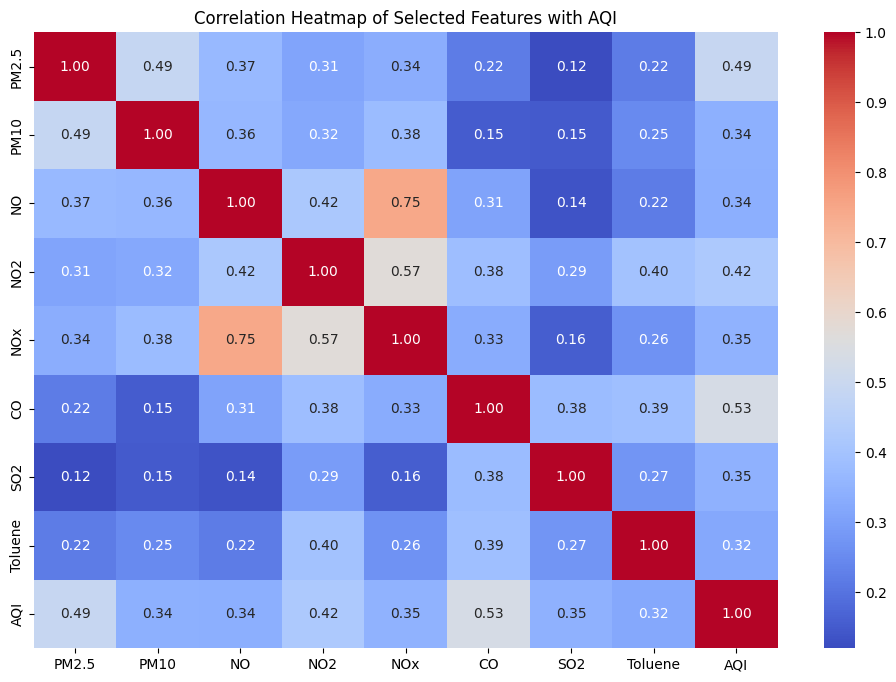

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for the selected features
correlation_matrix_selected = df_selected_features.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features with AQI')
plt.show()

EXACT CORRELATION VALUES OF ALL POLLUTANTS WITH AQI

In [85]:
# Calculate the correlation values of all pollutants with AQI
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
correlation_values = df_standard_scalar[pollutants].apply(lambda x: x.corr(df_selected_features['AQI']))

# Display the exact correlation values
print("Exact Correlation Values of Pollutants with AQI:")
correlation_values

Exact Correlation Values of Pollutants with AQI:


PM2.5      0.488885
PM10       0.342090
NO         0.336979
NO2        0.419183
NOx        0.349090
NH3        0.081022
CO         0.534197
SO2        0.345680
O3         0.100488
Benzene    0.242301
Toluene    0.322037
Xylene     0.200754
dtype: float64

In [69]:
df_selected_features.shape

(707875, 9)

KEEPING ONLY THE SELECTED FEATURES IN A SEPARATE DATAFRAME 'df_feature_selection'

In [87]:
# Create a copy of the DataFrame
df_feature_selection = df_selected_features.copy()

# Drop the 'AQI_Bucket' column
df_feature_selection.drop(columns=['AQI'], inplace=True)

# Display the DataFrame after dropping the column
df_feature_selection.head()


PM2.5      PM10        NO       NO2       NOx        CO       SO2  \
0 -0.250923 -0.198743 -0.503117  0.467460  0.167172  0.006887  6.206220   
1 -0.250923 -0.198743 -0.536290  0.010511 -0.290059 -1.112090  4.148208   
2 -0.250923 -0.198743 -0.534259 -0.303689 -0.527741 -1.017103  2.266581   
3 -0.250923 -0.198743 -0.526812 -0.410659 -0.579400 -0.708996  1.509834   
4 -0.250923 -0.198743 -0.532905 -0.468430 -0.616495 -0.956666  1.117236   

    Toluene  
0 -1.380562  
1 -1.380562  
2 -1.380562  
3 -1.380562  
4 -1.380562

**EDA**

In [89]:
import pandas as pd

# Create a copy of the DataFrame
df_outliers = df_standard_scalar.copy()

#  Extract the year from the 'Datetime' column and add it as a separate feature
df_outliers['Year'] = pd.to_datetime(df_outliers['Datetime']).dt.year
df_outliers['Month']= pd.to_datetime(df_outliers['Datetime']).dt.month
df_outliers['Day']= pd.to_datetime(df_outliers['Datetime']).dt.day
df_outliers['Hour']= pd.to_datetime(df_outliers['Datetime']).dt.hour
df_outliers['Minute']= pd.to_datetime(df_outliers['Datetime']).dt.minute
df_outliers['Second']= pd.to_datetime(df_outliers['Datetime']).dt.second


#Display the first few rows of the DataFrame to verify the changes
df_outliers.head()


City            Datetime     PM2.5      PM10        NO       NO2  \
0  Ahmedabad 2015-01-01 01:00:00 -0.250923 -0.198743 -0.503117  0.467460   
1  Ahmedabad 2015-01-01 02:00:00 -0.250923 -0.198743 -0.536290  0.010511   
2  Ahmedabad 2015-01-01 03:00:00 -0.250923 -0.198743 -0.534259 -0.303689   
3  Ahmedabad 2015-01-01 04:00:00 -0.250923 -0.198743 -0.526812 -0.410659   
4  Ahmedabad 2015-01-01 05:00:00 -0.250923 -0.198743 -0.532905 -0.468430   

        NOx       NH3        CO       SO2  ...   Toluene    Xylene       AQI  \
0  0.167172 -0.220368  0.006887  6.206220  ... -1.380562 -1.234515 -0.278752   
1 -0.290059 -0.220368 -1.112090  4.148208  ... -1.380562 -1.234515 -0.278752   
2 -0.527741 -0.220368 -1.017103  2.266581  ... -1.380562 -1.234515 -0.278752   
3 -0.579400 -0.220368 -0.708996  1.509834  ... -1.380562 -1.234515 -0.278752   
4 -0.616495 -0.220368 -0.956666  1.117236  ... -1.380562 -1.234515 -0.278752   

   AQI_Bucket  Year  Month  Day  Hour  Minute  Second  
0      0.0027  2015      1    1     1       0       0  
1      0.0027  2015      1    1     2       0       0  
2      0.0027  2015      1    1     3       0       0  
3      0.0027  2015      1    1     4       0       0  
4      0.0027  2015      1    1     5       0       0  

[5 rows x 22 columns]

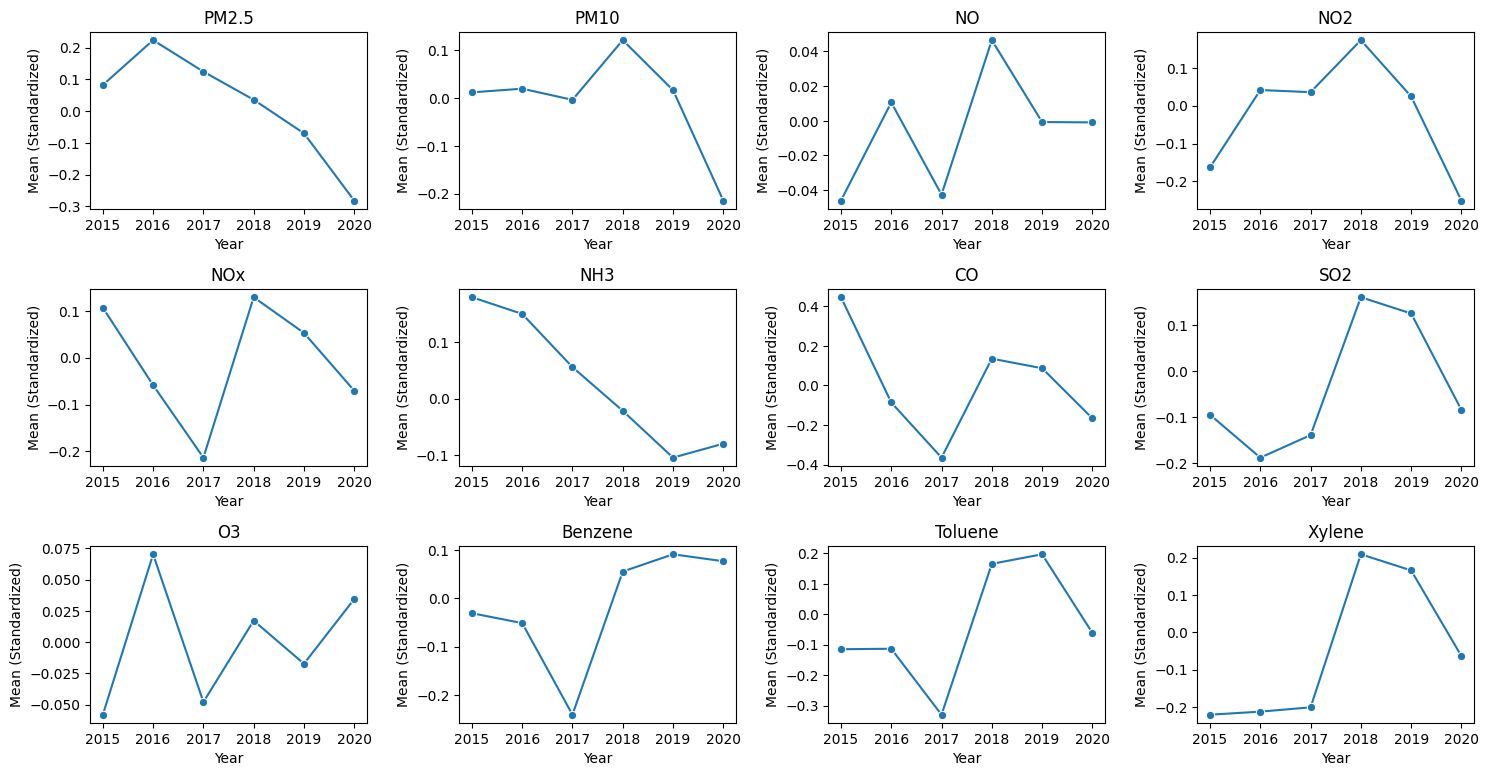

In [92]:
import pandas as pd

# Ensure the Datetime column is in datetime format
df_standard_scalar['Datetime'] = pd.to_datetime(df_standard_scalar['Datetime'])

# Extract the year and add it as a separate column
df_standard_scalar['Year'] = df_standard_scalar['Datetime'].dt.year

# List of pollutant columns (excluding non-pollutant columns)
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Group by year and calculate the mean for each pollutant
yearly_means = df_standard_scalar.groupby('Year')[pollutant_columns].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Plot line plots for each pollutant
for i, column in enumerate(pollutant_columns, 1):
    plt.subplot(4, 4, i)
    sns.lineplot(data=yearly_means, x='Year', y=column, marker='o')
    plt.title(column)
    plt.xlabel('Year')
    plt.ylabel('Mean (Standardized)')

# Adjust layout
plt.tight_layout()
plt.show()


To visualize the five most polluted cities in India from 2015 to 2020 based on the 'df_standard_scalar' DataFrame, we need to calculate the Mean AQI for Each City, Identify the Top 5 Most Polluted Cities, Visualize the AQI of These Cities Over the Years.

In [98]:
df_AQI = df_logtransform.copy()

         City         AQI
0   Ahmedabad  332.574452
10      Delhi  258.658470
19    Lucknow  211.370373
12   Gurugram  205.553952
21      Patna  204.443709


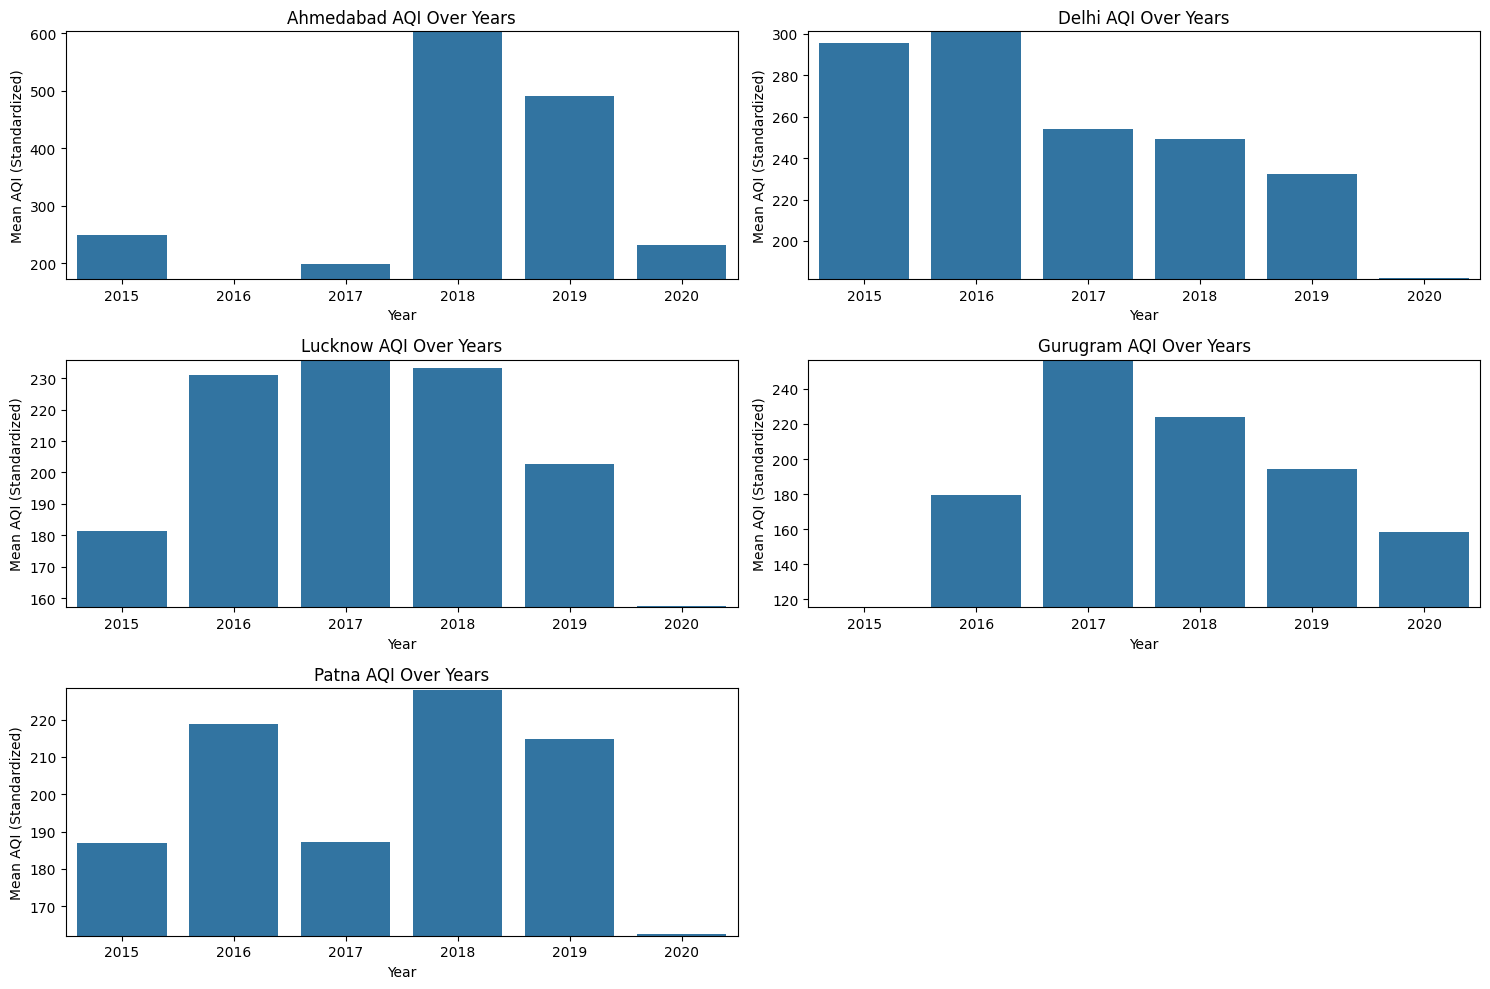

In [99]:
import pandas as pd

# Ensure the Datetime column is in datetime format
df_AQI['Datetime'] = pd.to_datetime(df_AQI['Datetime'])

# Extract the year and add it as a separate column
df_AQI['Year'] = df_AQI['Datetime'].dt.year

# Calculate the mean AQI for each city over the tenure 2015 - 2020
mean_aqi_per_city = df_AQI.groupby('City')['AQI'].mean().reset_index()

# Sort the cities by mean AQI in descending order and select the top 5
top_5_polluted_cities = mean_aqi_per_city.sort_values(by='AQI', ascending=False).head(5)
print(top_5_polluted_cities)

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the top 5 most polluted cities
top_cities_data = df_AQI[df_AQI['City'].isin(top_5_polluted_cities['City'])]

# Calculate the mean AQI for each year for the top 5 cities
yearly_aqi_top_cities = top_cities_data.groupby(['Year', 'City'])['AQI'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a bar plot for each of the top 5 polluted cities
for i, city in enumerate(top_5_polluted_cities['City'], 1):
    plt.subplot(3, 2, i)
    city_data = yearly_aqi_top_cities[yearly_aqi_top_cities['City'] == city]
    sns.barplot(data=city_data, x='Year', y='AQI')
    plt.title(f'{city} AQI Over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean AQI (Standardized)')
    plt.ylim(city_data['AQI'].min() - 0.5, city_data['AQI'].max() + 0.5)  # Adjust y-axis for better visualization

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


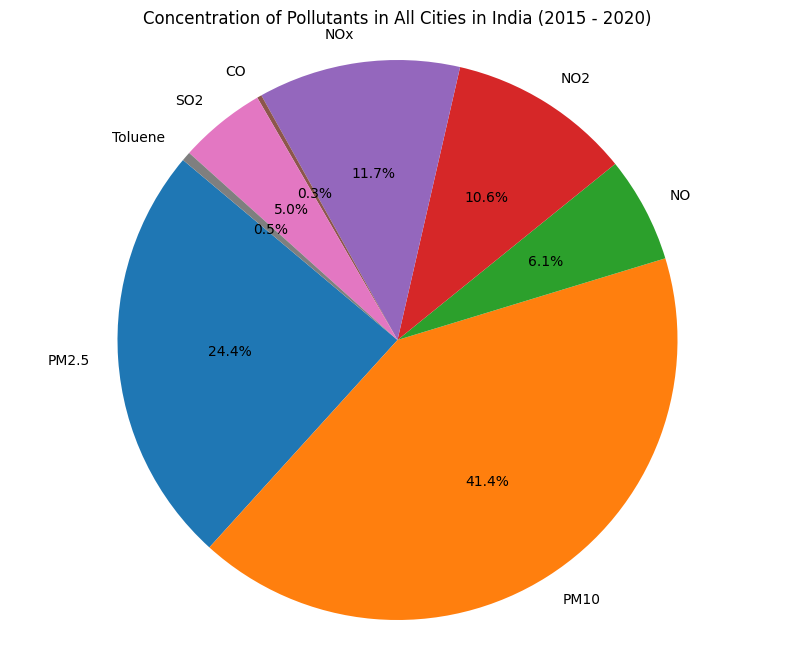

In [102]:
import pandas as pd

# Ensure the Datetime column is in datetime format
df_AQI['Datetime'] = pd.to_datetime(df_AQI['Datetime'])

# Extract the year and add it as a separate column
df_AQI['Year'] = df_AQI['Datetime'].dt.year

# Filter the data for the years 2015 - 2020
df_AQI_filtered = df_AQI[(df_AQI['Year'] >= 2015) & (df_AQI['Year'] <= 2020)]

# Select the columns that represent the pollutants
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'Toluene']

# Sum the concentration of each pollutant across all cities and years
pollutant_sums = df_AQI_filtered[pollutant_columns].sum().reset_index()
pollutant_sums.columns = ['Pollutant', 'Total Concentration']

import matplotlib.pyplot as plt

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(pollutant_sums['Total Concentration'], labels=pollutant_sums['Pollutant'], autopct='%1.1f%%', startangle=140)
plt.title('Concentration of Pollutants in All Cities in India (2015 - 2020)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [90]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a copy of the DataFrame 'outliers_removed_df'
# df_copy = outliers_removed_df.copy()

# # Extract the year from the 'Datetime' column
# df_copy['Year'] = df_copy['Datetime'].dt.year

# # Iterate over each pollutant and generate line plots for each
# pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# for pollutant in pollutants:
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(x='Year', y=pollutant, data=df_copy)
#     plt.title(f'Trend of {pollutant} from 2015 to 2020')
#     plt.xlabel('Year')
#     plt.ylabel('Pollutant Concentration')
#     plt.show()

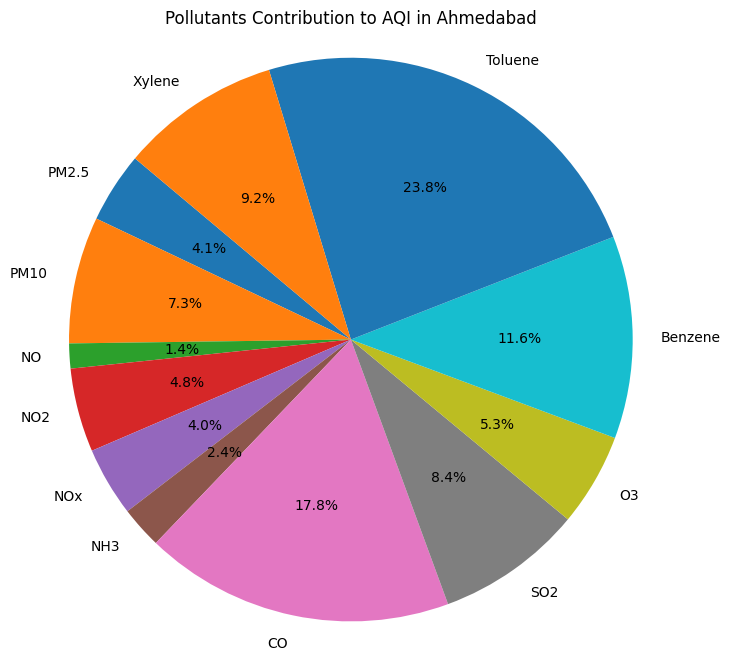

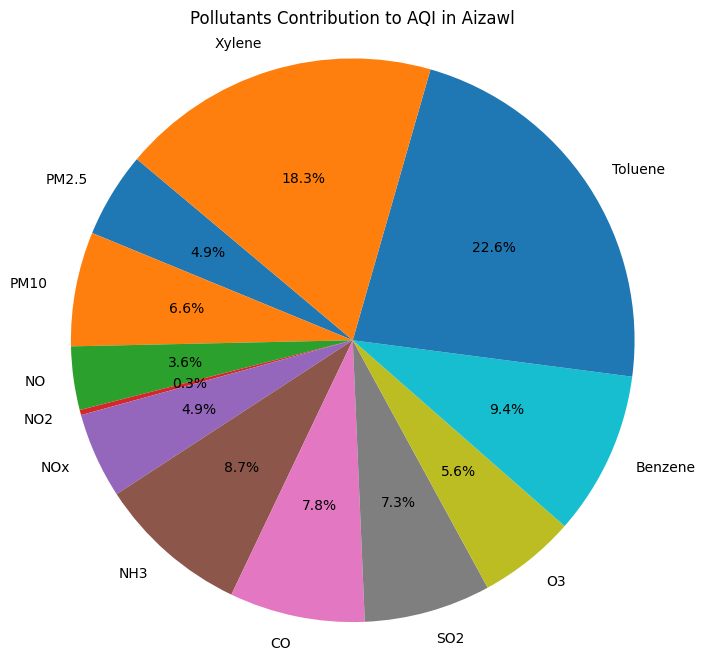

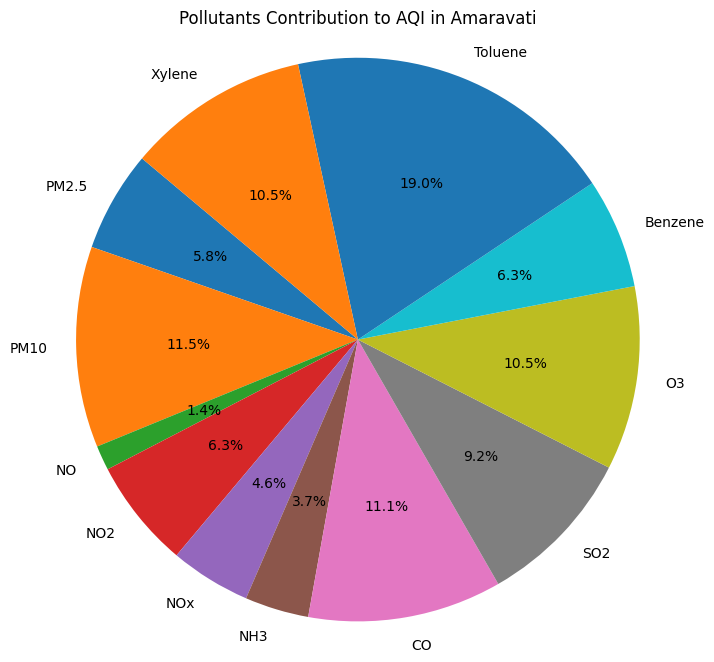

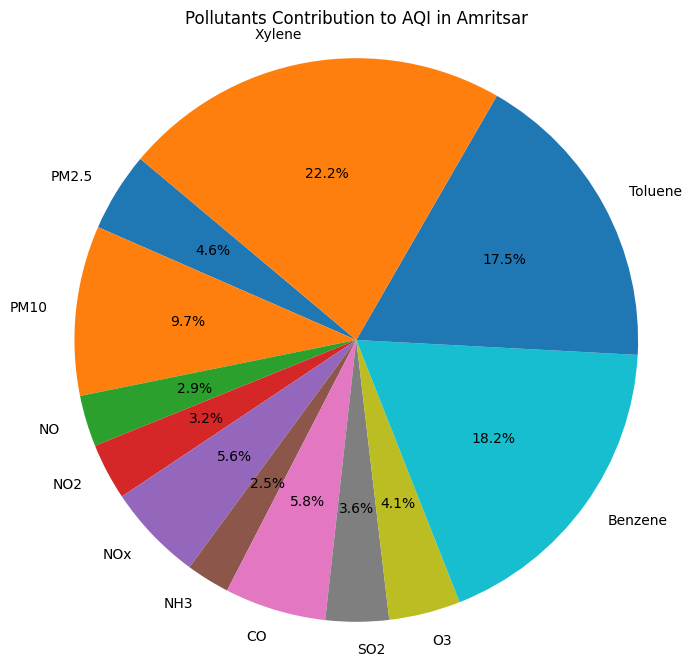

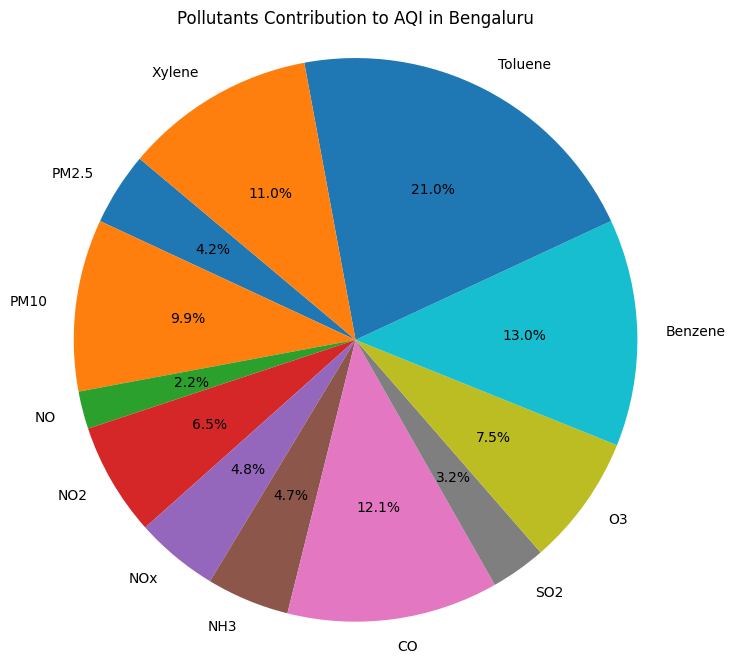

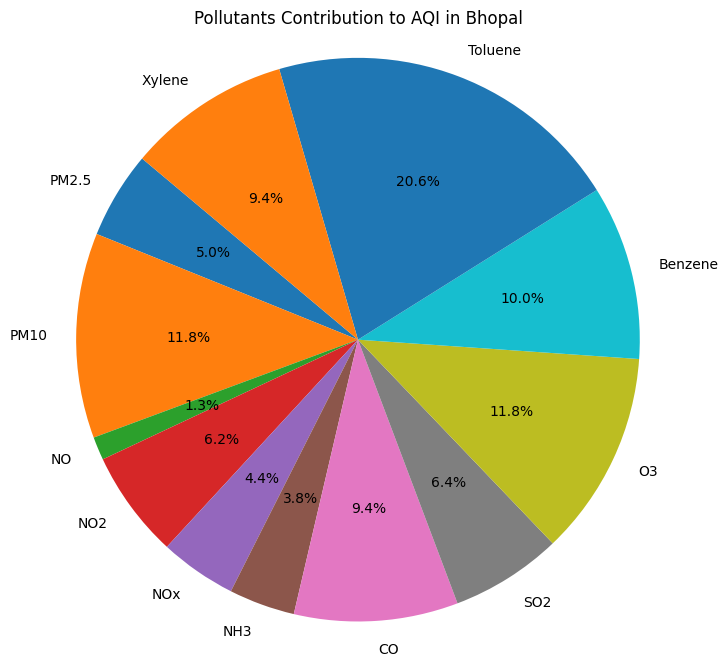

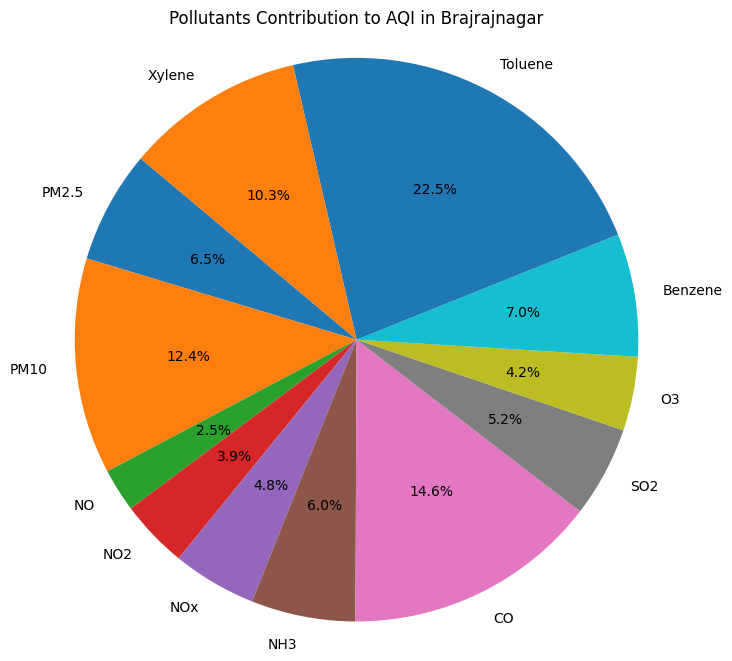

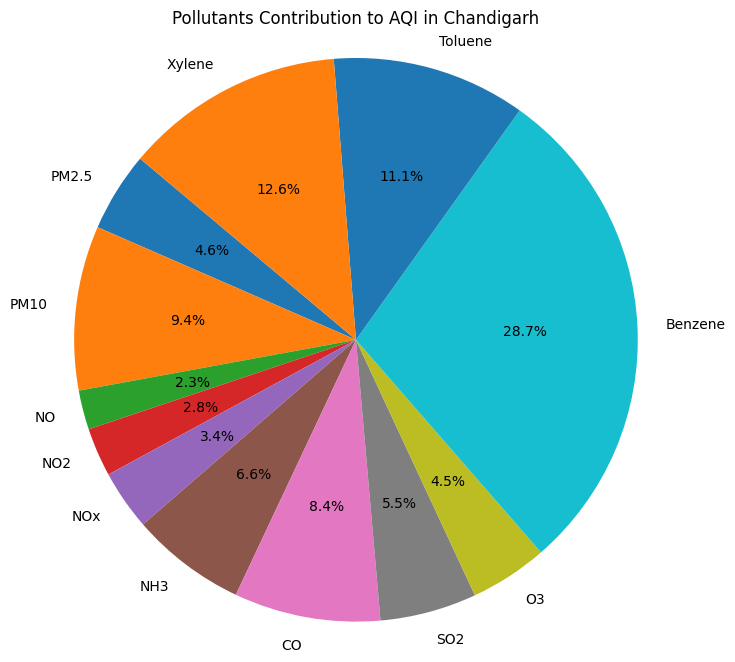

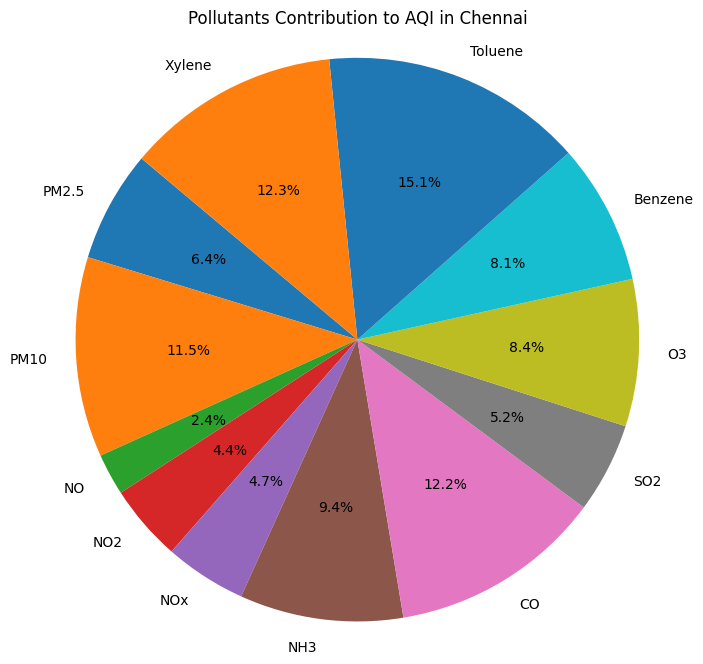

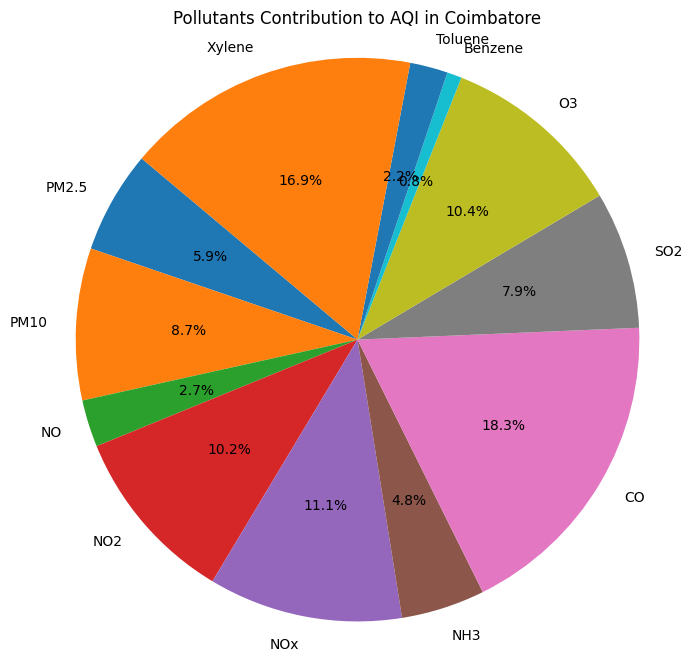

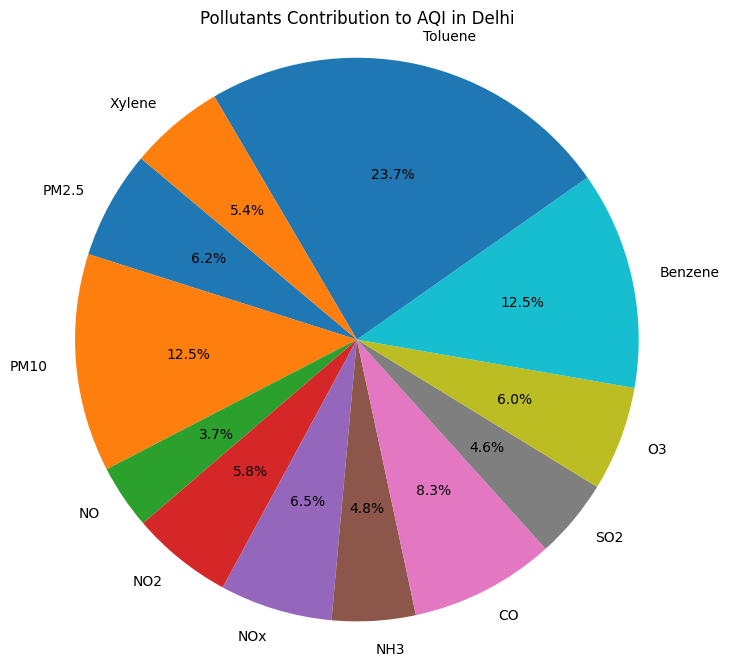

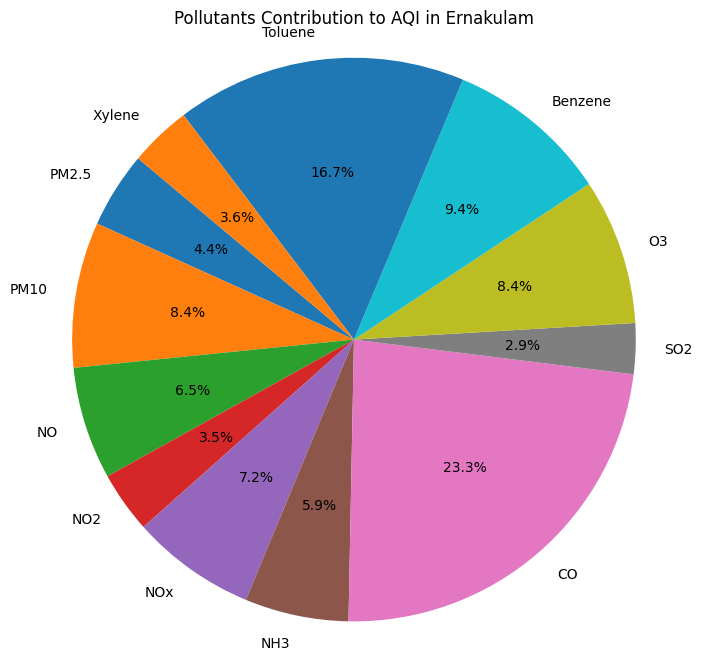

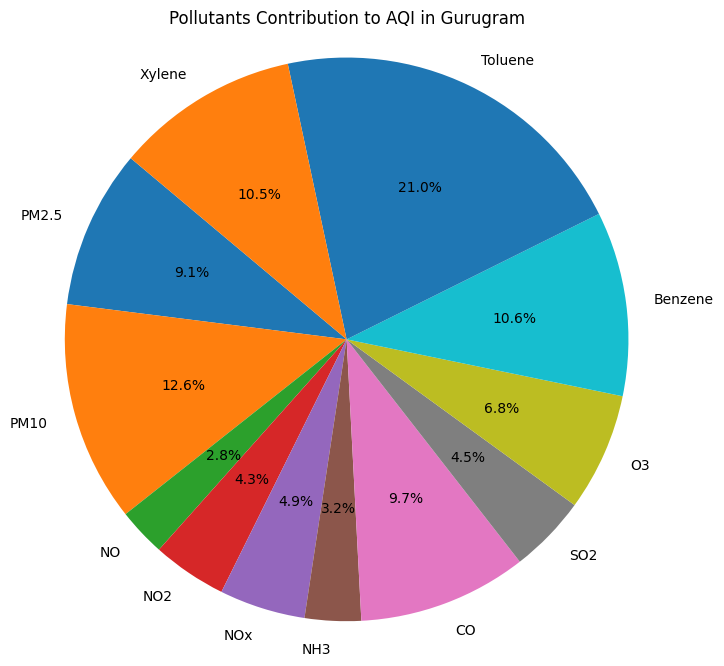

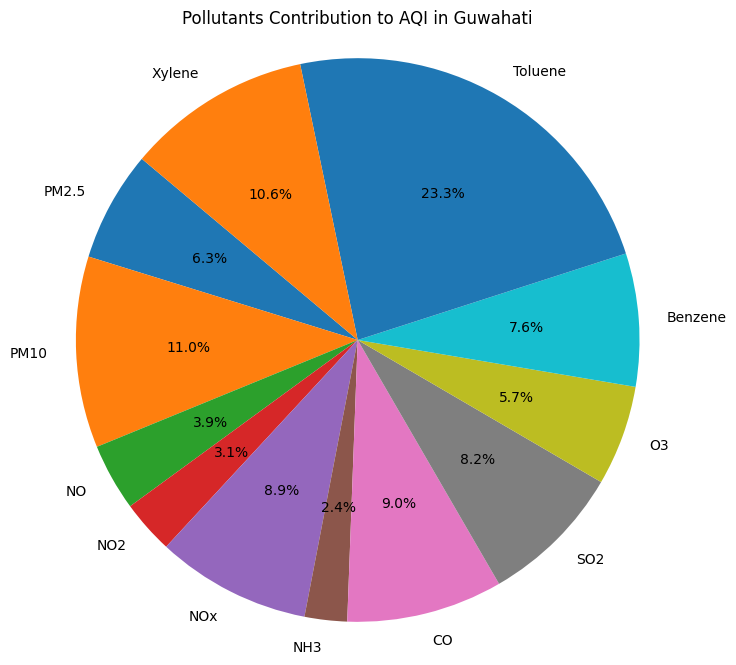

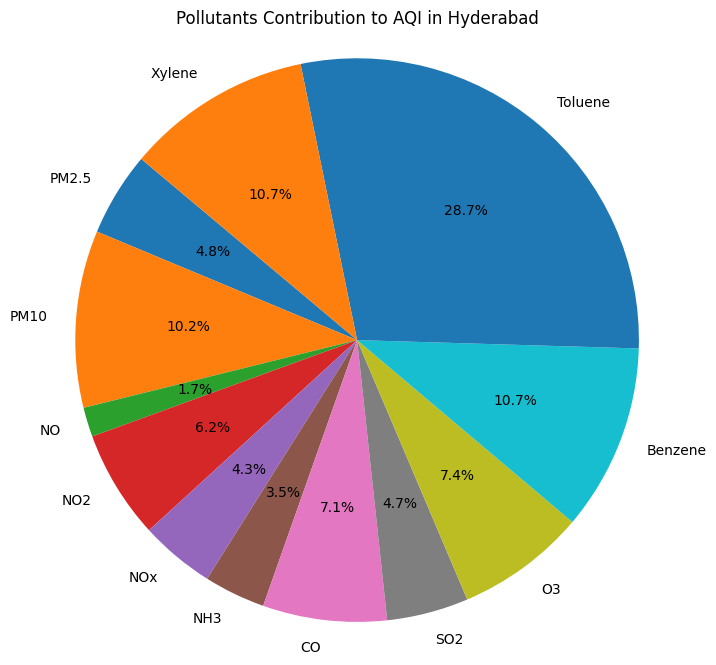

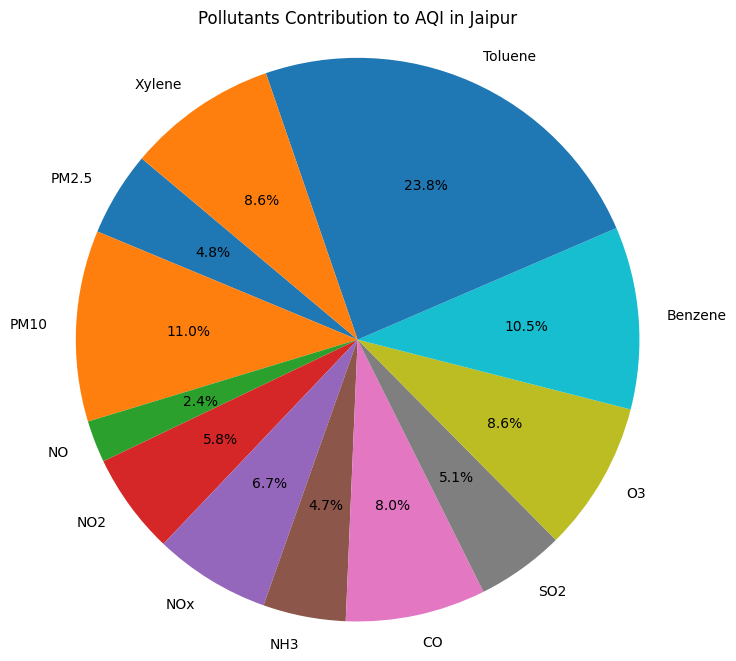

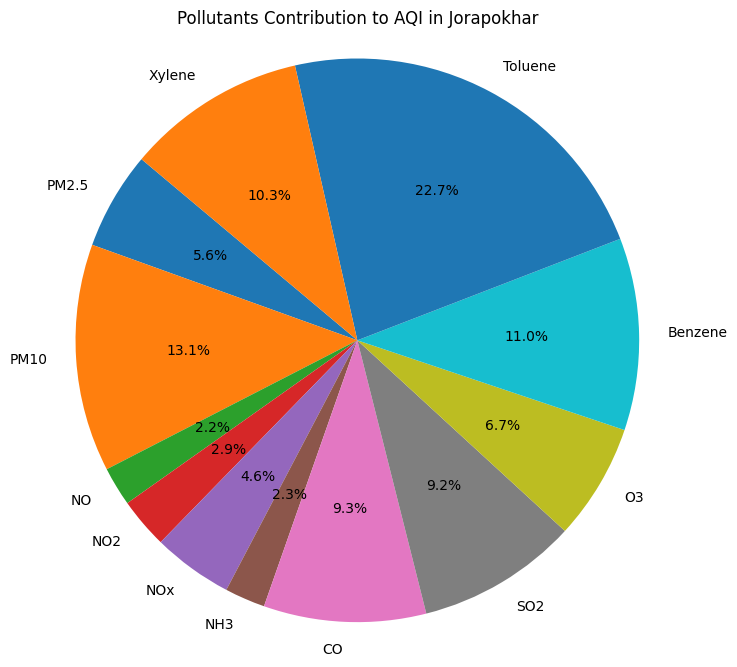

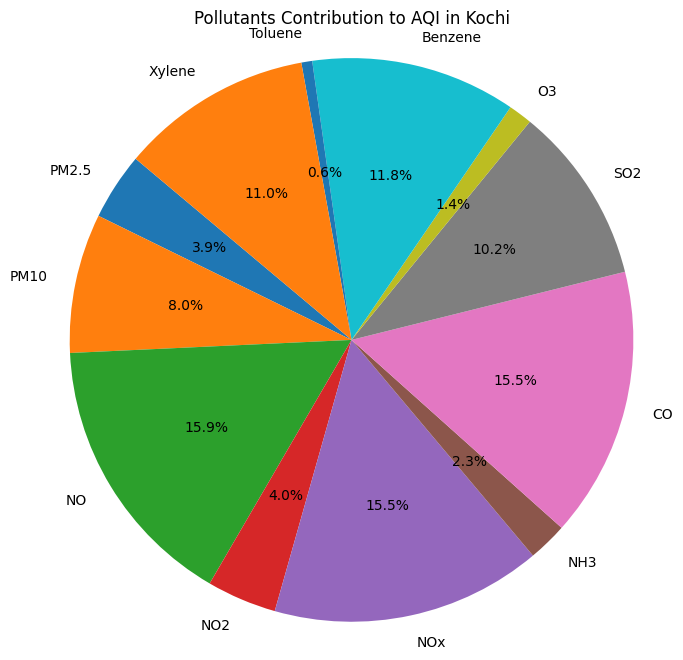

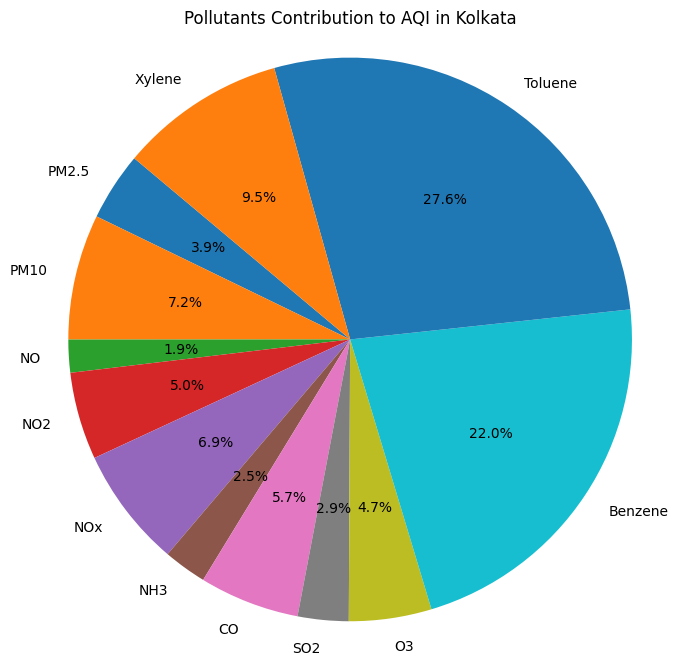

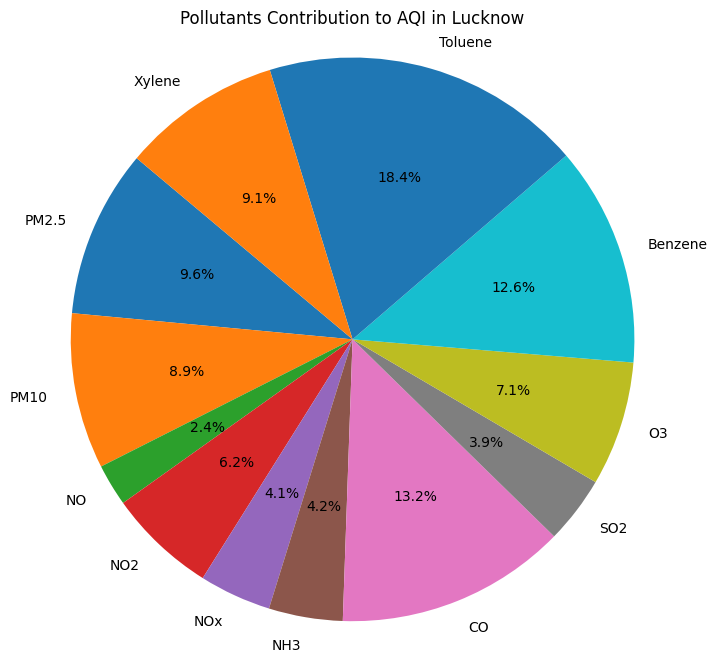

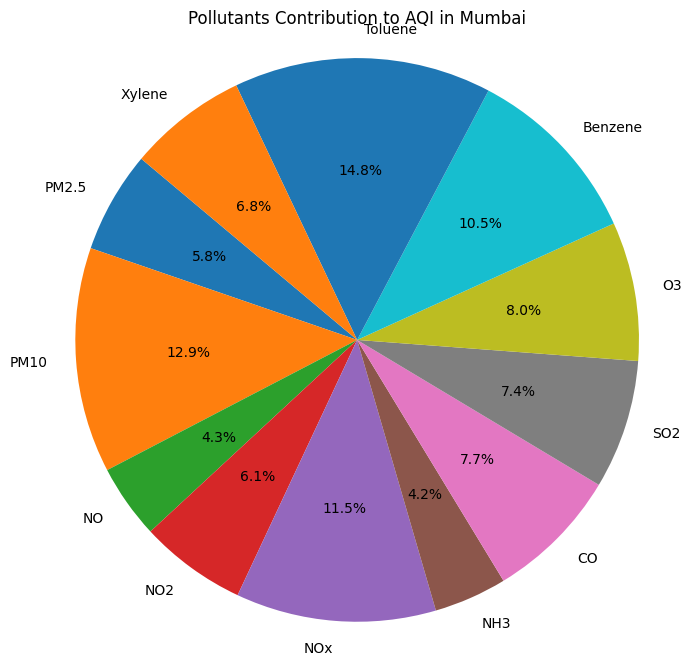

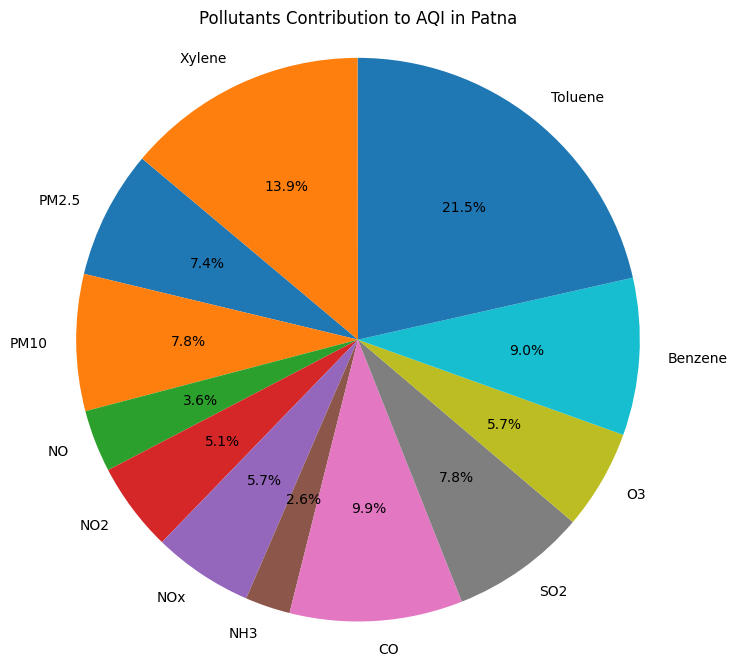

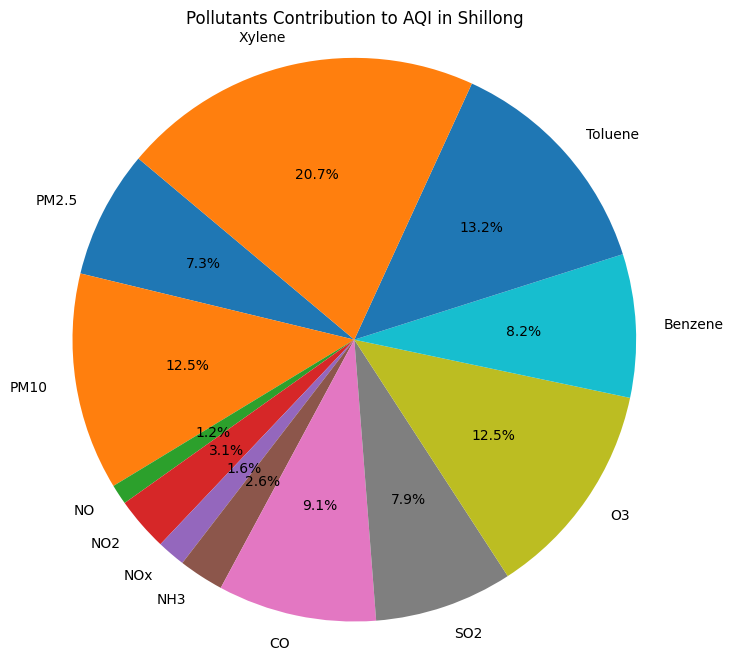

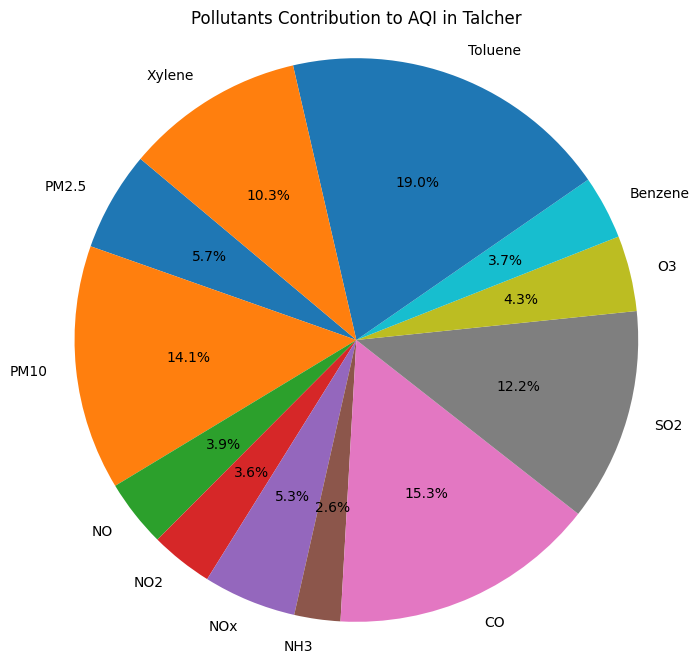

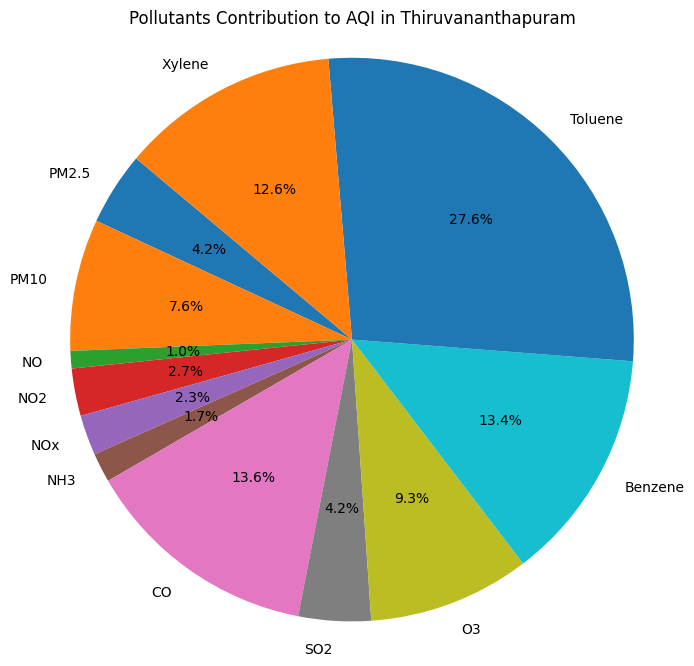

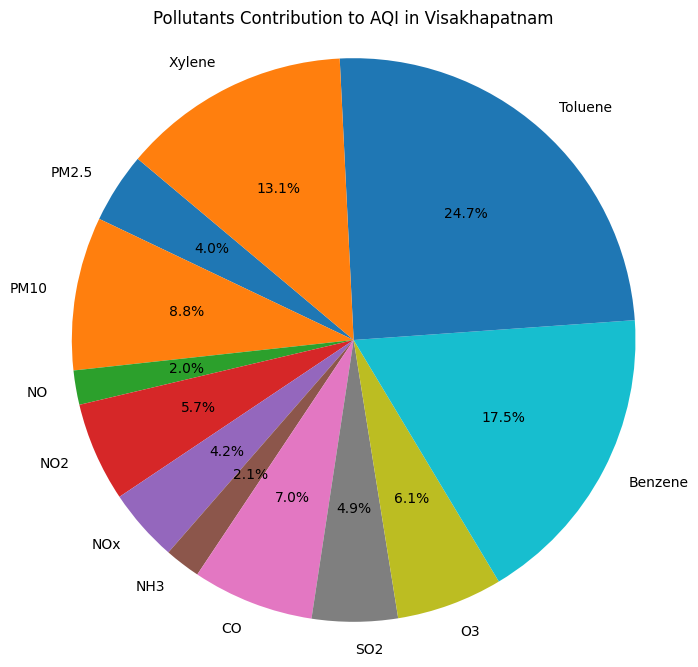

In [ ]:
import matplotlib.pyplot as plt

# Group the data by city
grouped_data = outliers_removed_df.groupby('City')

# Iterate over each city and generate a pie chart for pollutants contributing to AQI
for city, data in grouped_data:
    pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    pollutant_values = [data[pollutant].mean() for pollutant in pollutants]

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(pollutant_values, labels=pollutants, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pollutants Contribution to AQI in {city}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

## EDA Completed till here -----



In [ ]:
if 'AQI_Bucket' in outliers_removed_df.columns:
    unique_values = outliers_removed_df['AQI_Bucket'].unique()
    print(unique_values)
else:
    print("'AQI_Bucket' column does not exist.")


[0.4 0.6 0.8 1.  0.2 0. ]


In [ ]:
feat_cols =  ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
features = outliers_removed_df[feat_cols]

In [ ]:
features.tail()

PM2.5      PM10       NO       NO2       NOx       NH3        CO  \
707870  0.009490  0.035990  0.00548  0.051171  0.031788  0.009121  0.077639   
707871  0.017240  0.049240  0.00722  0.066446  0.041355  0.007541  0.090978   
707872  0.035991  0.070991  0.00438  0.061642  0.036501  0.007321  0.073615   
707873  0.015740  0.062991  0.00202  0.057838  0.032089  0.007581  0.064176   
707874  0.014990  0.065991  0.00078  0.053734  0.028178  0.010381  0.074630   

             SO2        O3   Benzene   Toluene    Xylene      AQI  
707870  0.041810  0.055746  0.099888  0.205643  0.093655  0.01376  
707871  0.010053  0.051386  0.099888  0.205643  0.093655  0.01376  
707872  0.008802  0.052531  0.099888  0.205643  0.093655  0.01344  
707873  0.003701  0.031772  0.099888  0.205643  0.093655  0.01344  
707874  0.010453  0.034244  0.099888  0.205643  0.093655  0.01344

In [ ]:
features.shape

(672873, 13)

In [ ]:
outliers_removed_df.shape

(672873, 16)

In [ ]:
outliers_removed_df.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
outliers_removed_df.shape

(672873, 16)

In [ ]:
predictor_cols = ['PM2.5', 'PM10', 'NO2', 'NOx', 'CO'	]
target_col = ['AQI']

In [ ]:
X = outliers_removed_df[predictor_cols]
y = outliers_removed_df[target_col]


In [ ]:
y.tail()

AQI
707870  0.01376
707871  0.01376
707872  0.01344
707873  0.01344
707874  0.01344

In [ ]:
X.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
CO       0
dtype: int64

## Model Training Starts Here WITHOUT SMOTE ----

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


NameError: name 'X' is not defined

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Simplified SVR model with optimized hyperparameters
model = SVR(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics for test data
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, np.abs(y_pred)))  # Ensure predictions are positive

# Print performance metrics for test data
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("RMSLE:", rmsle)

# Calculate performance metrics for training data
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, np.abs(y_train_pred)))  # Ensure predictions are positive

# Print performance metrics for training data
print("Training MAE:", mae_train)
print("Training RMSE:", rmse_train)
print("Training R2:", r2_train)
print("Training RMSLE:", rmsle_train)

In [ ]:
import numpy as np
from xgboost import XGBRegressor

# Train the XGBoost regression model
model_xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmsle_xgb = np.sqrt(mean_squared_log_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate accuracy, precision, recall and f1-score
y_pred_binary_xgb = (y_pred_xgb > 0.5).astype(int)
accuracy_xgb = accuracy_score(y_test, y_pred_binary_xgb)
precision_xgb = precision_score(y_test, y_pred_binary_xgb)
recall_xgb = recall_score(y_test, y_pred_binary_xgb)
f1_xgb = f1_score(y_test, y_pred_binary_xgb)

# Print performance metrics
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("RMSLE:", rmsle_xgb)
print("R2:", r2_xgb)
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 score:", f1_xgb)

# Calculate performance metrics for training data
y_train_pred_xgb = model_xgb.predict(X_train)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmsle_train_xgb = np.sqrt(mean_squared_log_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

# Calculate accuracy, precision, recall and f1-score for training data
y_train_pred_binary_xgb = (y_train_pred_xgb > 0.5).astype(int)
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_binary_xgb)
precision_train_xgb = precision_score(y_train, y_train_pred_binary_xgb)
recall_train_xgb = recall_score(y_train, y_train_pred_binary_xgb)
f1_train_xgb = f1_score(y_train, y_train_pred_binary_xgb)

# Print performance metrics for training data
print("Training MAE:", mae_train_xgb)
print("Training RMSE:", rmse_train_xgb)
print("Training RMSLE:", rmsle_train_xgb)
print("Training R2:", r2_train_xgb)
print("Training Accuracy:", accuracy_train_xgb)
print("Training Precision:", precision_train_xgb)
print("Training Recall:", recall_train_xgb)
print("Training F1 score:", f1_train_xgb)


In [ ]:
import numpy as np
# Train the Random Forest regression model
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmsle_rf = np.sqrt(mean_squared_log_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate accuracy, precision, recall and f1-score
y_pred_binary_rf = (y_pred_rf > 0.5).astype(int)
accuracy_rf = accuracy_score(y_test, y_pred_binary_rf)
precision_rf = precision_score(y_test, y_pred_binary_rf)
recall_rf = recall_score(y_test, y_pred_binary_rf)
f1_rf = f1_score(y_test, y_pred_binary_rf)

# Print performance metrics
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("RMSLE:", rmsle_rf)
print("R2:", r2_rf)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 score:", f1_rf)

# Calculate performance metrics for training data
y_train_pred_rf = model_rf.predict(X_train)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmsle_train_rf = np.sqrt(mean_squared_log_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Calculate accuracy, precision, recall and f1-score for training data
y_train_pred_binary_rf = (y_train_pred_rf > 0.5).astype(int)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_binary_rf)
precision_train_rf = precision_score(y_train, y_train_pred_binary_rf)
recall_train_rf = recall_score(y_train, y_train_pred_binary_rf)
f1_train_rf = f1_score(y_train, y_train_pred_binary_rf)

# Print performance metrics for training data
print("Training MAE:", mae_train_rf)
print("Training RMSE:", rmse_train_rf)
print("Training RMSLE:", rmsle_train_rf)
print("Training R2:", r2_train_rf)
print("Training Accuracy:", accuracy_train_rf)
print("Training Precision:", precision_train_rf)
print("Training Recall:", recall_train_rf)
print("Training F1 score:", f1_train_rf)


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Train the KNN regression model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Calculate performance metrics for test data
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
rmsle_knn = np.sqrt(mean_squared_log_error(y_test, np.abs(y_pred_knn)))  # Ensure predictions are positive

# Print performance metrics for test data
print("MAE:", mae_knn)
print("RMSE:", rmse_knn)
print("R2:", r2_knn)
print("RMSLE:", rmsle_knn)

# Calculate performance metrics for training data
y_train_pred_knn = model_knn.predict(X_train)
mae_train_knn = mean_absolute_error(y_train, y_train_pred_knn)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
r2_train_knn = r2_score(y_train, y_train_pred_knn)
rmsle_train_knn = np.sqrt(mean_squared_log_error(y_train, np.abs(y_train_pred_knn)))  # Ensure predictions are positive

# Print performance metrics for training data
print("Training MAE:", mae_train_knn)
print("Training RMSE:", rmse_train_knn)
print("Training R2:", r2_train_knn)
print("Training RMSLE:", rmsle_train_knn)

In [ ]:
import numpy as np
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Train the Gaussian Naive Bayes regression model
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = model_gnb.predict(X_test)

# Calculate performance metrics for test data
mae_gnb = mean_absolute_error(y_test, y_pred_gnb)
rmse_gnb = np.sqrt(mean_squared_error(y_test, y_pred_gnb))
r2_gnb = r2_score(y_test, y_pred_gnb)
rmsle_gnb = np.sqrt(mean_squared_log_error(y_test, np.abs(y_pred_gnb)))  # Ensure predictions are positive

# Print performance metrics for test data
print("MAE:", mae_gnb)
print("RMSE:", rmse_gnb)
print("R2:", r2_gnb)
print("RMSLE:", rmsle_gnb)

# Calculate performance metrics for training data
y_train_pred_gnb = model_gnb.predict(X_train)
mae_train_gnb = mean_absolute_error(y_train, y_train_pred_gnb)
rmse_train_gnb = np.sqrt(mean_squared_error(y_train, y_train_pred_gnb))
r2_train_gnb = r2_score(y_train, y_train_pred_gnb)
rmsle_train_gnb = np.sqrt(mean_squared_log_error(y_train, np.abs(y_train_pred_gnb)))  # Ensure predictions are positive

# Print performance metrics for training data
print("Training MAE:", mae_train_gnb)
print("Training RMSE:", rmse_train_gnb)
print("Training R2:", r2_train_gnb)
print("Training RMSLE:", rmsle_train_gnb)

NOW FOR SMOTE SAMPLING y HAS 'AQI_Bucket'

In [ ]:
X_sm = log_transformed_df.copy()

In [ ]:
X_sm.head()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0  0.139793  0.223708  0.000599  0.155513  0.083952  0.139905  0.004444   
1  0.139793  0.223708  0.000941  0.119916  0.059479  0.139905  0.006659   
2  0.139793  0.223708  0.002737  0.128372  0.081982  0.139905  0.018207   
3  0.139793  0.223708  0.012488  0.130788  0.136536  0.139905  0.078671   
4  0.139793  0.223708  0.017449  0.110896  0.121837  0.139905  0.108085   

        SO2        O3  Benzene  Toluene  Xylene       AQI  
0  0.711956  0.189018      0.0      0.0     0.0  0.210117  
1  0.439682  0.189018      0.0      0.0     0.0  0.210117  
2  0.402480  0.462924      0.0      0.0     0.0  0.210117  
3  0.221593  0.879657      0.0      0.0     0.0  0.210117  
4  0.203936  0.189018      0.0      0.0     0.0  0.210117

In [ ]:
y_sm = df_cleaned['AQI_Bucket']

In [ ]:
y_sm

2         2.0
4         2.0
5         2.0
8         2.0
9         2.0
         ... 
707870    1.0
707871    1.0
707872    0.0
707873    0.0
707874    0.0
Name: AQI_Bucket, Length: 627604, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sm, y_train_sm)

In [ ]:
X_train_resampled.shape


(1366500, 13)

In [ ]:
y_train_resampled.shape

(1366500,)

In [ ]:
X_train_resampled.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [ ]:
y_train_resampled = X_train_resampled['AQI']
X_train_resampled = X_train_resampled.drop(columns=['AQI'])

In [ ]:
X_train_resampled

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0        0.147565  0.286671  0.027970  0.086978  0.097136  0.095485  0.043580   
1        0.139793  0.223708  0.068001  0.163566  0.157524  0.139905  0.043580   
2        0.106389  0.265741  0.067231  0.196666  0.210865  0.081194  0.037163   
3        0.138046  0.262097  0.506886  0.086494  0.400667  0.487712  0.057344   
4        0.204344  0.367020  0.068001  0.163566  0.157524  0.108957  0.042513   
...           ...       ...       ...       ...       ...       ...       ...   
1366495  0.291272  0.619661  0.087362  0.536172  0.494224  0.326900  0.328067   
1366496  0.558115  0.223708  0.025399  0.111469  0.035479  0.139905  0.073617   
1366497  0.212863  0.778775  0.732139  0.799259  0.470441  0.476916  0.021319   
1366498  0.115632  0.223708  0.077287  0.337301  0.113684  0.139905  0.407897   
1366499  0.427607  0.690669  0.384490  0.727158  0.405386  0.295084  0.031672   

              SO2        O3   Benzene   Toluene    Xylene  
0        0.077638  0.473157  0.007276  0.050813  0.019735  
1        0.112684  0.189018  0.014173  0.059281  0.052873  
2        0.102305  0.360957  0.006617  0.266651  0.052873  
3        0.113358  0.021691  0.137197  0.016022  0.069680  
4        0.054724  0.189018  0.014173  0.059281  0.052873  
...           ...       ...       ...       ...       ...  
1366495  0.267204  0.480904  0.038219  0.252340  0.052873  
1366496  0.093590  0.101605  0.014173  0.059281  0.052873  
1366497  0.265389  0.103599  0.029975  0.084283  0.052873  
1366498  0.933900  0.861861  0.066935  0.739501  0.410656  
1366499  0.305490  0.176212  0.057102  0.203444  0.052873  

[1366500 rows x 12 columns]

In [ ]:
y_train_resampled

0          0.190661
1          0.210117
2          0.161479
3          0.184825
4          0.210117
             ...   
1366495    0.801987
1366496    0.788102
1366497    0.915304
1366498    0.805917
1366499    0.826406
Name: AQI, Length: 1366500, dtype: float64

In [ ]:
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_sm, y_test_sm)

In [ ]:
X_test_resampled.shape

(455340, 13)

In [ ]:
y_test_resampled.shape

(455340,)

In [ ]:
y_test_resampled = X_test_resampled['AQI']
X_test_resampled = X_test_resampled.drop(columns=['AQI'])

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Simplified SVR model with optimized hyperparameters
model = SVR(kernel='linear', C=1.0)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_resampled)

# Calculate performance metrics for test data
mae = mean_absolute_error(y_test_resampled, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_resampled, y_pred))
r2 = r2_score(y_test_resampled, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test_resampled, np.abs(y_pred)))  # Ensure predictions are positive

# Print performance metrics for test data
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("RMSLE:", rmsle)

# Calculate performance metrics for training data
y_train_pred = model.predict(X_train_resampled)
mae_train = mean_absolute_error(y_train_resampled, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train_resampled, y_train_pred))
r2_train = r2_score(y_train_resampled, y_train_pred)
rmsle_train = np.sqrt(mean_squared_log_error(y_train_resampled, np.abs(y_train_pred)))  # Ensure predictions are positive

# Print performance metrics for training data
print("Training MAE:", mae_train)
print("Training RMSE:", rmse_train)
print("Training R2:", r2_train)
print("Training RMSLE:", rmsle_train)

In [ ]:
import numpy as np
from xgboost import XGBRegressor

# Train the XGBoost regression model
model_xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
model_xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test_resampled)

# Calculate performance metrics
mae_xgb = mean_absolute_error(y_test_resampled, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_resampled, y_pred_xgb))
rmsle_xgb = np.sqrt(mean_squared_log_error(y_test_resampled, y_pred_xgb))
r2_xgb = r2_score(y_test_resampled, y_pred_xgb)

# Calculate accuracy, precision, recall and f1-score
y_pred_binary_xgb = (y_pred_xgb > 0.5).astype(int)
accuracy_xgb = accuracy_score(y_test_resampled, y_pred_binary_xgb)
precision_xgb = precision_score(y_test_resampled, y_pred_binary_xgb)
recall_xgb = recall_score(y_test_resampled, y_pred_binary_xgb)
f1_xgb = f1_score(y_test_resampled, y_pred_binary_xgb)

# Print performance metrics
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("RMSLE:", rmsle_xgb)
print("R2:", r2_xgb)
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 score:", f1_xgb)

# Calculate performance metrics for training data
y_train_pred_xgb = model_xgb.predict(X_train_resampled)
mae_train_xgb = mean_absolute_error(y_train_resampled, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train_resampled, y_train_pred_xgb))
rmsle_train_xgb = np.sqrt(mean_squared_log_error(y_train_resampled, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train_resampled, y_train_pred_xgb)

# Calculate accuracy, precision, recall and f1-score for training data
y_train_pred_binary_xgb = (y_train_pred_xgb > 0.5).astype(int)
accuracy_train_xgb = accuracy_score(y_train_resampled, y_train_pred_binary_xgb)
precision_train_xgb = precision_score(y_train_resampled, y_train_pred_binary_xgb)
recall_train_xgb = recall_score(y_train_resampled, y_train_pred_binary_xgb)
f1_train_xgb = f1_score(y_train_resampled, y_train_pred_binary_xgb)

# Print performance metrics for training data
print("Training MAE:", mae_train_xgb)
print("Training RMSE:", rmse_train_xgb)
print("Training RMSLE:", rmsle_train_xgb)
print("Training R2:", r2_train_xgb)
print("Training Accuracy:", accuracy_train_xgb)
print("Training Precision:", precision_train_xgb)
print("Training Recall:", recall_train_xgb)
print("Training F1 score:", f1_train_xgb)


In [ ]:
import numpy as np
# Train the Random Forest regression model
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_resampled)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test_resampled, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_resampled, y_pred_rf))
rmsle_rf = np.sqrt(mean_squared_log_error(y_test_resampled, y_pred_rf))
r2_rf = r2_score(y_test_resampled, y_pred_rf)

# Calculate accuracy, precision, recall and f1-score
y_pred_binary_rf = (y_pred_rf > 0.5).astype(int)
accuracy_rf = accuracy_score(y_test_resampled, y_pred_binary_rf)
precision_rf = precision_score(y_test_resampled, y_pred_binary_rf)
recall_rf = recall_score(y_test_resampled, y_pred_binary_rf)
f1_rf = f1_score(y_test_resampled, y_pred_binary_rf)

# Print performance metrics
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("RMSLE:", rmsle_rf)
print("R2:", r2_rf)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 score:", f1_rf)

# Calculate performance metrics for training data
y_train_pred_rf = model_rf.predict(X_train_resampled)
mae_train_rf = mean_absolute_error(y_train_resampled, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train_resampled, y_train_pred_rf))
rmsle_train_rf = np.sqrt(mean_squared_log_error(y_train_resampled, y_train_pred_rf))
r2_train_rf = r2_score(y_train_resampled, y_train_pred_rf)

# Calculate accuracy, precision, recall and f1-score for training data
y_train_pred_binary_rf = (y_train_pred_rf > 0.5).astype(int)
accuracy_train_rf = accuracy_score(y_train_resampled, y_train_pred_binary_rf)
precision_train_rf = precision_score(y_train_resampled, y_train_pred_binary_rf)
recall_train_rf = recall_score(y_train_resampled, y_train_pred_binary_rf)
f1_train_rf = f1_score(y_train_resampled, y_train_pred_binary_rf)

# Print performance metrics for training data
print("Training MAE:", mae_train_rf)
print("Training RMSE:", rmse_train_rf)
print("Training RMSLE:", rmsle_train_rf)
print("Training R2:", r2_train_rf)
print("Training Accuracy:", accuracy_train_rf)
print("Training Precision:", precision_train_rf)
print("Training Recall:", recall_train_rf)
print("Training F1 score:", f1_train_rf)


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Train the KNN regression model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test_resampled)

# Calculate performance metrics for test data
mae_knn = mean_absolute_error(y_test_resampled, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test_resampled, y_pred_knn))
r2_knn = r2_score(y_test_resampled, y_pred_knn)
rmsle_knn = np.sqrt(mean_squared_log_error(y_test_resampled, np.abs(y_pred_knn)))  # Ensure predictions are positive

# Print performance metrics for test data
print("MAE:", mae_knn)
print("RMSE:", rmse_knn)
print("R2:", r2_knn)
print("RMSLE:", rmsle_knn)

# Calculate performance metrics for training data
y_train_pred_knn = model_knn.predict(X_train_resampled)
mae_train_knn = mean_absolute_error(y_train_resampled, y_train_pred_knn)
rmse_train_knn = np.sqrt(mean_squared_error(y_train_resampled, y_train_pred_knn))
r2_train_knn = r2_score(y_train_resampled, y_train_pred_knn)
rmsle_train_knn = np.sqrt(mean_squared_log_error(y_train_resampled, np.abs(y_train_pred_knn)))  # Ensure predictions are positive

# Print performance metrics for training data
print("Training MAE:", mae_train_knn)
print("Training RMSE:", rmse_train_knn)
print("Training R2:", r2_train_knn)
print("Training RMSLE:", rmsle_train_knn)

In [ ]:
import numpy as np
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Train the Gaussian Naive Bayes regression model
model_gnb = GaussianNB()
model_gnb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_gnb = model_gnb.predict(X_test_resampled)

# Calculate performance metrics for test data
mae_gnb = mean_absolute_error(y_test_resampled, y_pred_gnb)
rmse_gnb = np.sqrt(mean_squared_error(y_test_resampled, y_pred_gnb))
r2_gnb = r2_score(y_test_resampled, y_pred_gnb)
rmsle_gnb = np.sqrt(mean_squared_log_error(y_test_resampled, np.abs(y_pred_gnb)))  # Ensure predictions are positive

# Print performance metrics for test data
print("MAE:", mae_gnb)
print("RMSE:", rmse_gnb)
print("R2:", r2_gnb)
print("RMSLE:", rmsle_gnb)

# Calculate performance metrics for training data
y_train_pred_gnb = model_gnb.predict(X_train_resampled)
mae_train_gnb = mean_absolute_error(y_train_resampled, y_train_pred_gnb)
rmse_train_gnb = np.sqrt(mean_squared_error(y_train_resampled, y_train_pred_gnb))
r2_train_gnb = r2_score(y_train_resampled, y_train_pred_gnb)
rmsle_train_gnb = np.sqrt(mean_squared_log_error(y_train_resampled, np.abs(y_train_pred_gnb)))  # Ensure predictions are positive

# Print performance metrics for training data
print("Training MAE:", mae_train_gnb)
print("Training RMSE:", rmse_train_gnb)
print("Training R2:", r2_train_gnb)
print("Training RMSLE:", rmsle_train_gnb)